# Dataset
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy import stats
import math



import gc

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Rakamin/Travel.csv')

Flow:
- Data exploration
- EDA
- Business insight
- Handling Missing Value
- Handling Duplicated Data
- Handling Invalid Values
- Feature Extraction
- Feature Selection
- Feature Transformation (Numeric)
- Feature Encoding (Categoric)
- Handling Imbalance
- Modelling
- Evaluation
- Visualization

# Exploratory Data Analysis

In [5]:
df.sample(10, random_state=100)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3476,203476,1,40.0,Company Invited,1,9.0,Salaried,Female,3,5.0,Basic,5.0,Unmarried,4.0,1,3,0,1.0,Executive,22324.0
1011,201011,0,36.0,Self Enquiry,3,9.0,Small Business,Fe Male,2,3.0,Deluxe,4.0,Unmarried,4.0,1,4,0,1.0,Manager,24278.0
159,200159,0,34.0,Company Invited,3,8.0,Small Business,Female,3,3.0,Basic,3.0,Divorced,7.0,0,5,1,2.0,Executive,17231.0
2477,202477,1,40.0,Self Enquiry,3,12.0,Large Business,Male,3,4.0,Deluxe,3.0,Divorced,5.0,0,2,0,2.0,Manager,20764.0
291,200291,0,36.0,Self Enquiry,1,NaN,Large Business,Male,1,3.0,Deluxe,4.0,Single,5.0,0,2,1,0.0,Manager,19485.0
1618,201618,0,41.0,Self Enquiry,1,15.0,Salaried,Male,3,3.0,Basic,5.0,Married,3.0,0,1,0,0.0,Executive,17238.0
1983,201983,1,20.0,Self Enquiry,1,16.0,Small Business,Male,2,3.0,Basic,3.0,Single,2.0,1,5,1,1.0,Executive,16009.0
1740,201740,0,55.0,Self Enquiry,1,6.0,Small Business,Male,2,3.0,King,5.0,Single,1.0,1,1,1,1.0,VP,34045.0
3298,203298,0,46.0,Self Enquiry,1,14.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,6.0,1,3,1,1.0,Executive,23155.0
4705,204705,1,36.0,Self Enquiry,3,11.0,Large Business,Male,3,4.0,Standard,5.0,Unmarried,2.0,1,4,1,2.0,Senior Manager,28260.0


In [6]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Descriptive Statistics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

1. CustomerID: ID unik untuk setiap pelanggan.
2. ProdTaken: Indikator biner (0 atau 1) yang menunjukkan apakah pelanggan telah membeli paket liburan (1) atau tidak (0).
3. Age: Usia pelanggan.
4. TypeofContact: Jenis kontak yang digunakan untuk menghubungi pelanggan (Value; 'Company Invited' atau 'Self Enquiry').
5. CityTier: Tingkat kota tempat tinggal pelanggan (mengacu pada tingkat perkembangan atau status kota)(Value; 1-3).
6. DurationOfPitch: Durasi presentasi dalam menit saat menawarkan paket liburan kepada pelanggan.
7. Occupation: Pekerjaan pelanggan ('Salaried', 'Small Business', atau 'Large Business').
8. Gender: Jenis kelamin pelanggan(Male dan Female).
9. NumberOfPersonVisiting: Jumlah orang yang akan mengunjungi (berkaitan dengan jumlah anggota keluarga atau rekan bisnis yang akan ikut dalam perjalanan liburan).
10. NumberOfFollowups: Jumlah tindak lanjut yang telah dilakukan dengan pelanggan.
11. ProductPitched: Produk yang ditawarkan kepada pelanggan.(Basic, Deluxe, Standard, Super Deluxe, King)
12. PreferredPropertyStar: Tingkat bintang properti yang diinginkan oleh pelanggan.(Value;Bintang 3-5)
13. MaritalStatus: Status perkawinan pelanggan.(Single,Married,Divorce,Unmaried)
14. NumberOfTrips: Jumlah perjalanan yang telah dilakukan oleh pelanggan sebelumnya.
15. Passport: Indikator biner (0 atau 1) yang menunjukkan apakah pelanggan memiliki paspor (1) atau tidak (0).
16. PitchSatisfactionScore: Skor kepuasan pelanggan terhadap presentasi penawaran.(Value;1-5)
17. OwnCar: Indikator biner (0 atau 1) yang menunjukkan apakah pelanggan memiliki mobil (1) atau tidak (0).
18. NumberOfChildrenVisiting: Jumlah anak yang ikut dalam perjalanan liburan.
19. Designation: Jabatan atau posisi pekerjaan pelanggan.(Executive, Manager, Senior Manager, AVP, VP)
20. MonthlyIncome: Pendapatan bulanan pelanggan.



1. Terdapat kesalahan penulisan pada kolom Gender dimana 'Fe male' seharusnya 'Female'
2. Terdapat penggunaan istilah yang berbeda pada 'Unmarried' dan 'Single' dimana kedua status itu sama

In [8]:
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

In [9]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


1. Jumlah baris dalam dataset adalah 4.888.

2. Terdapat beberapa kolom yang memiliki missing value, yaitu kolom Age, DurationOfPitch, NumberOfTrips, PreferredPropertyStar, dan MonthlyIncome. Kolom-kolom ini perlu ditangani dengan metode pengisian nilai yang sesuai sebelum dilakukan analisis lebih lanjut.

3. Rata-rata usia (Age) pelanggan dalam dataset adalah 37.62 tahun dengan standar deviasi sebesar 9.32. Distribusi usia cenderung mendekati distribusi normal.

4. Durasi presentasi (DurationOfPitch), jumlah perjalanan (NumberOfTrips), dan pendapatan bulanan (MonthlyIncome) memiliki skewness positif, yang menunjukkan adanya pencilan atau outlier dalam data.

5. Sebagian besar pelanggan (75%) berada di CityTier 3.

6. Mayoritas pelanggan tidak memiliki paspor (Passport) dan tidak memiliki mobil pribadi (OwnCar).

7. Nilai kepuasan terhadap presentasi (PitchSatisfactionScore) rata-rata adalah 3.08 dari skala 1 hingga 5.

8. Mayoritas pelanggan (75%) memiliki jumlah anak yang mengunjungi (NumberOfChildrenVisiting) sebanyak 2.

9. Pendapatan bulanan (MonthlyIncome) rata-rata pelanggan adalah sebesar 23,619.85

10. Terdapat kolom-kolom diskrit atau ordinal lainnya yang tidak mencerminkan distribusi data tertentu.

In [10]:
df[cat_cols].describe().T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


1. Pada kolom TypeofContact terdapat missing value
2. Pada kolom TypeofContact dan Gender terdapat data yang tidak seimbang

In [11]:
'''#Mengecek Skewness
from scipy.stats import skew

skewness = df[num_cols].apply(skew)
print(skewness)'''

'#Mengecek Skewness\nfrom scipy.stats import skew\n\nskewness = df[num_cols].apply(skew)\nprint(skewness)'

In [12]:
for col in cat_cols:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom TypeofContact:
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Value count kolom Occupation:
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Value count kolom Gender:
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Value count kolom ProductPitched:
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Value count kolom MaritalStatus:
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Value count kolom Designation:
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



## Univariate Analysis

In [13]:
# define numerical & categorical columns

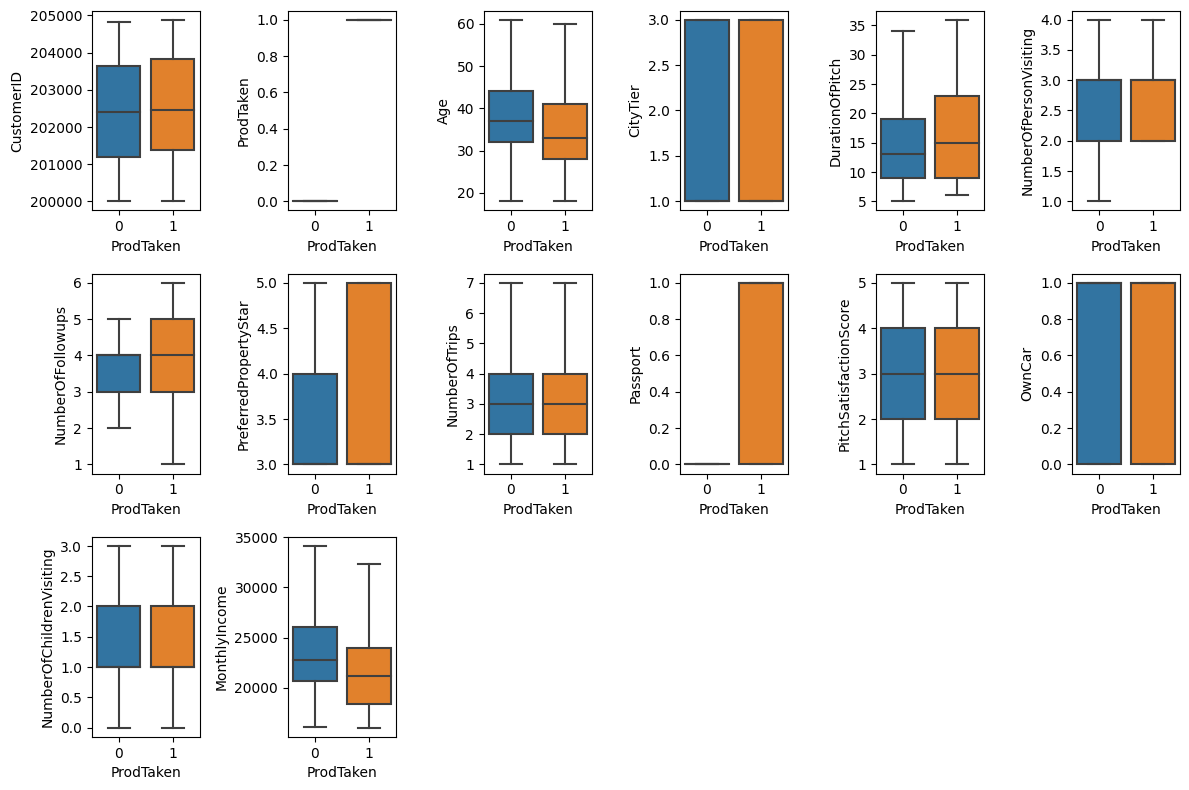

In [14]:
plt.figure(figsize=(12,8))
for i in range(0, len(num_cols)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df[num_cols[i]], x=df['ProdTaken'],showfliers=False , orient='v')
    plt.tight_layout()

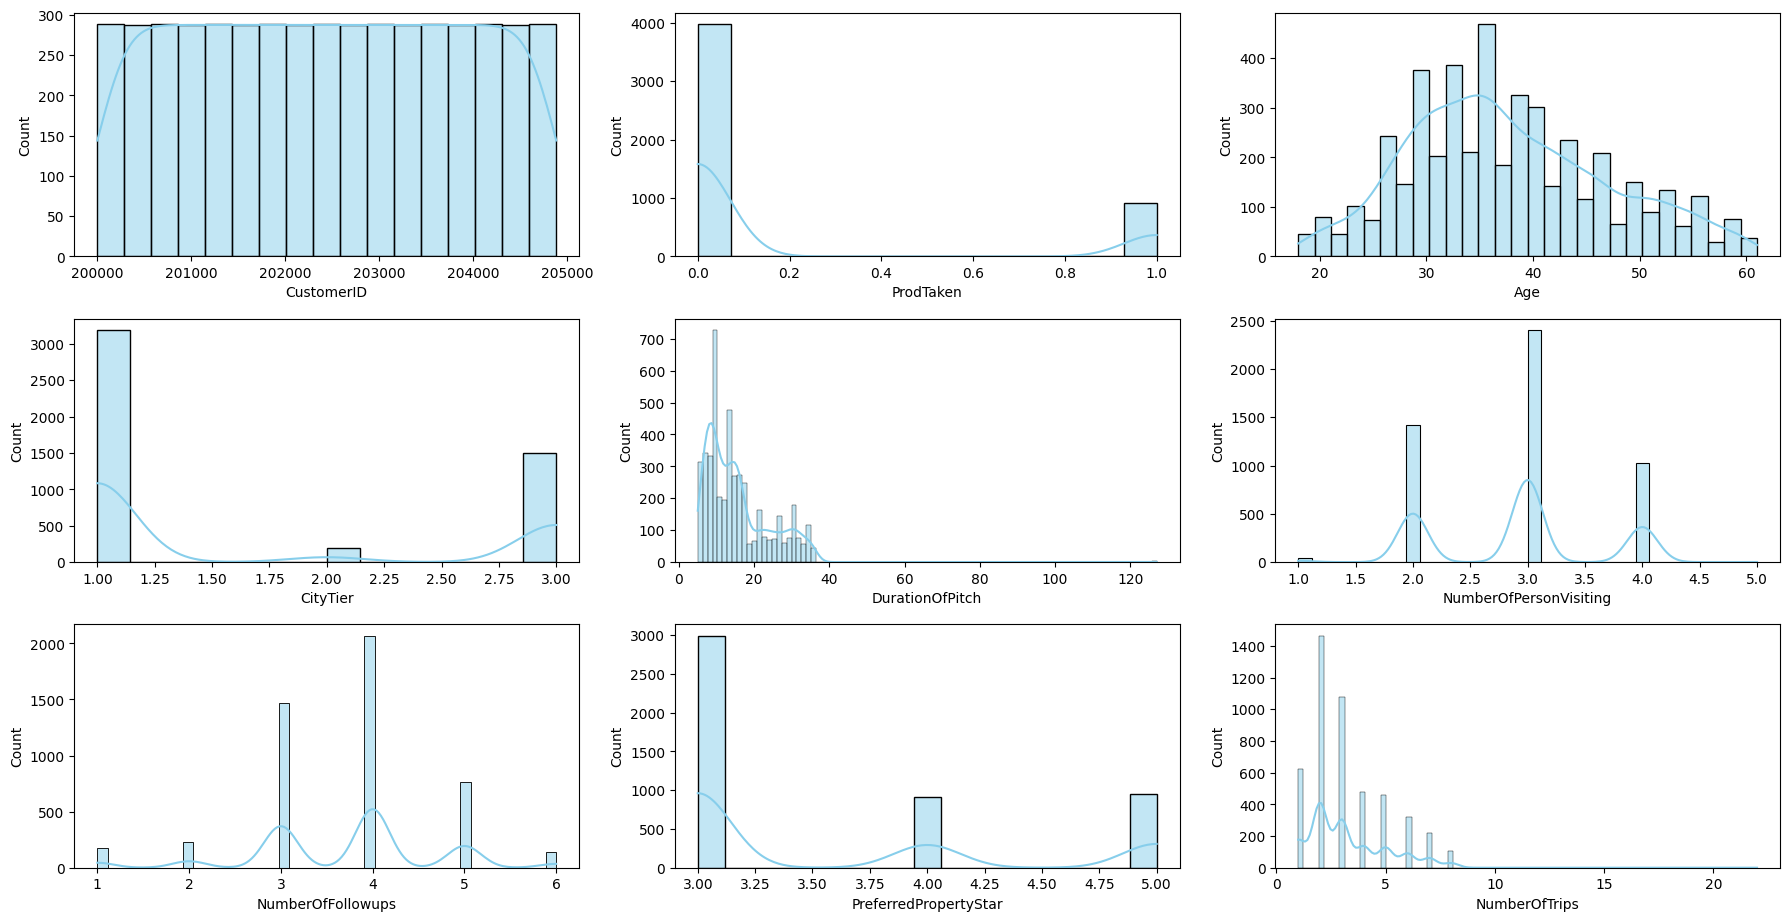

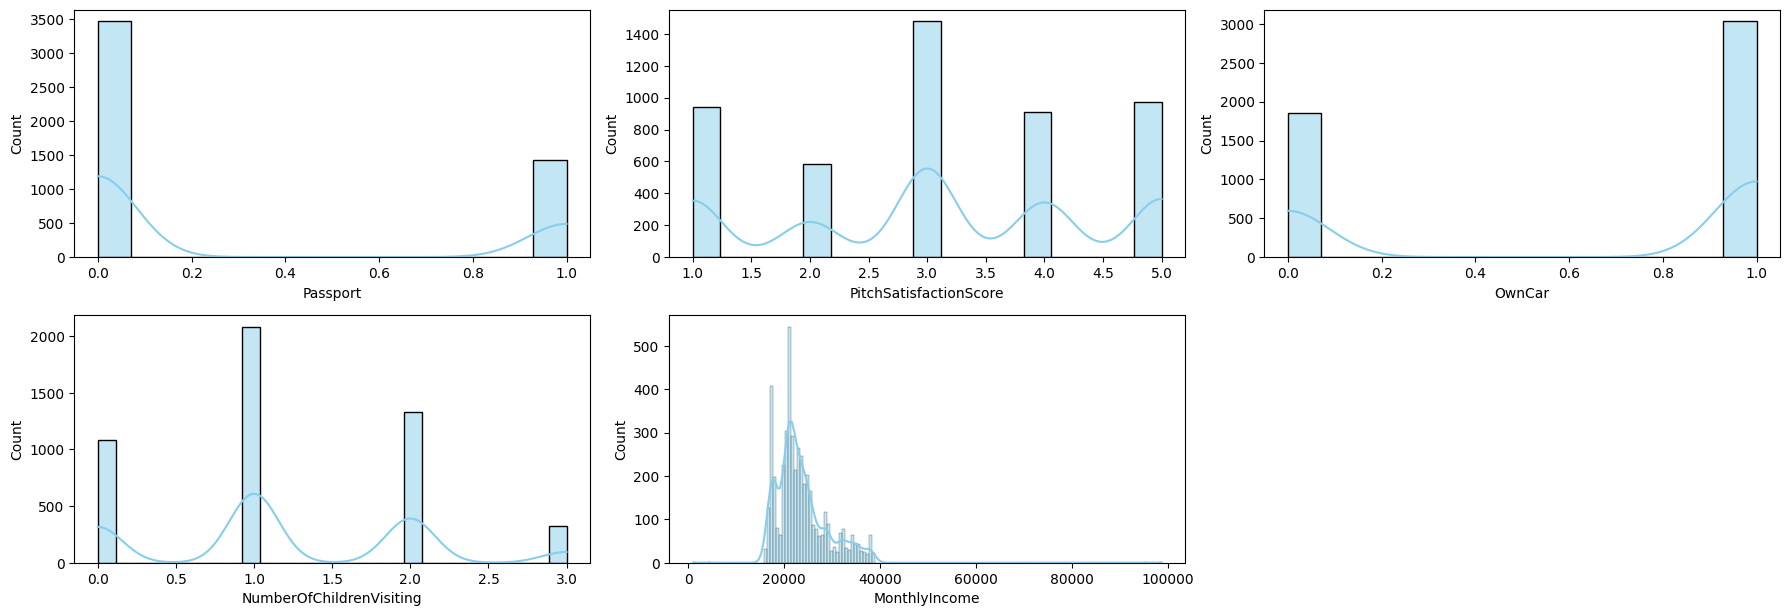

In [15]:
num_cols_count = len(num_cols)
num_rows = math.ceil(num_cols_count / 3)
num_figures = math.ceil(num_cols_count / 9)

for f in range(num_figures):
    start_idx = f * 9
    end_idx = min(start_idx + 9, num_cols_count)
    plt.figure(figsize=(18, 15))
    for i, col in enumerate(num_cols[start_idx:end_idx]):
        plt.subplot(num_rows, 3, i+1)
        sns.histplot(df[col].dropna(), kde=True, color='skyblue')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

Kesimpulan :
1. Distribusi kolom Age cenderung mendekati distribusi normal, menunjukkan penyebaran nilai yang seimbang.
2. kolom DurationOfPitch, NumberOfTrips, dan MonthlyIncome memiliki skewness positif, menunjukkan adanya pencilan atau outlier dalam data. Pencilan ini dapat memiliki pengaruh yang signifikan terhadap hasil analisis.
3. Untuk kolom lainnya, dapat diabaikan karena umumnya mengandung data diskrit atau ordinal, yang tidak memerlukan pertimbangan yang sama dengan variabel kontinu.

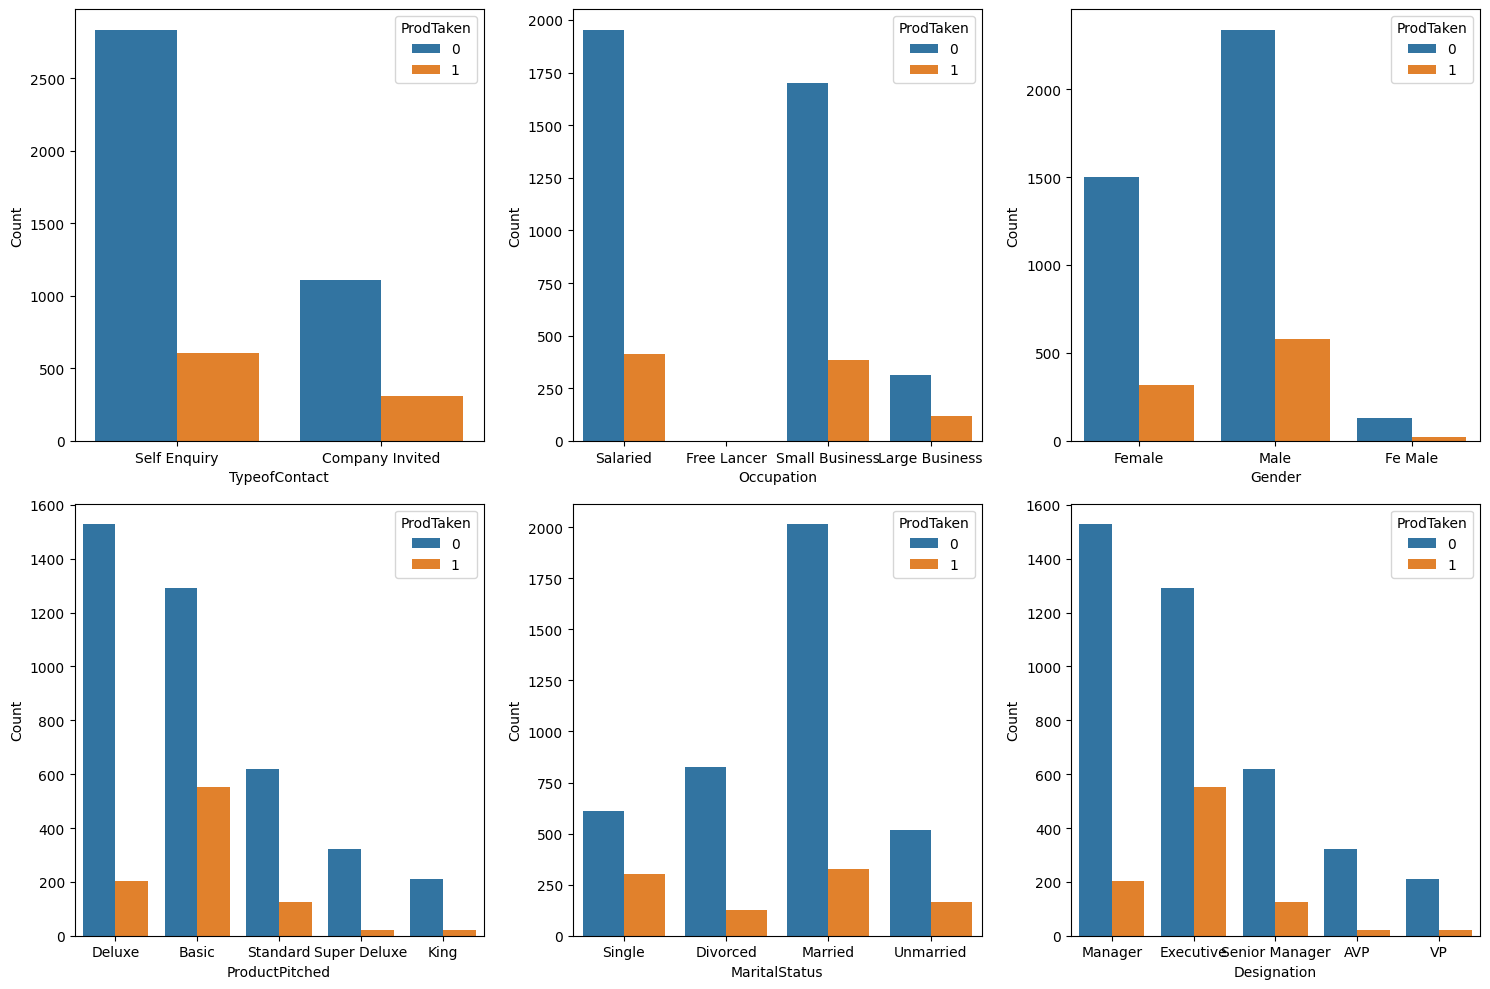

In [16]:
# Univariate analysis for categorical columns
num_cat_cols = len(cat_cols)
num_rows = (num_cat_cols - 1) // 3 + 1
plt.figure(figsize=(15, 5*num_rows))
for i, col in enumerate(cat_cols):
    plt.subplot(num_rows, 3, i+1)
    sns.countplot(x=col, data=df, hue=df['ProdTaken'])
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

1. Pada kolom TypeofContact distribusi Self Enquiry lebih banyak daripada Company Visited
2. Pada kolom Occupation distribusi Salaried dan Small Business paling banyak dibanding yang lainnya, dan pada Free Lancer nantinya akan dihapus karena tidak ada nilainya
3. Pada kolom Gender jenis kelamin laki-laki lebih banyak dibandingkan perempuan. Dan ada kesalahan penulisan Fe Male yang dimana seharusnya Female.
4. Pada kolom ProductPitched basic dan Deluxe memiliki penjualan tertinggi
5. Pada kolom MaritalStatus Customer yang sudah menikah memiliki jumlah paling banyak
6. Pada kolom Designation customer dengan jabatan Executive dan Manager memiliki jumlah paling banyak

## Multivariate Analysis

<ipython-input-17-493e948be1a1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


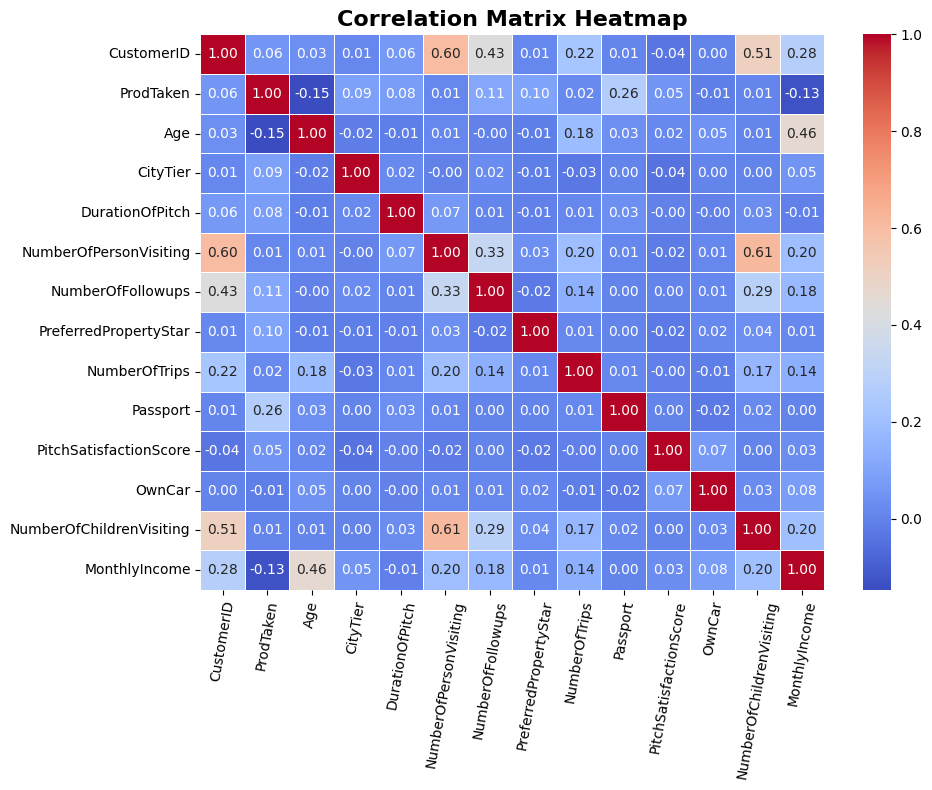

In [17]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

1. Kolom MonthlyIncome, Passport dan Age memiliki korelasi kuat terhadap kolom target (ProdTaken)
2. Kolom NumberOfChildrenVisiting dan NumberOfPersonVisiting memiliki korelasi kuat

## Business Insight and Visualization

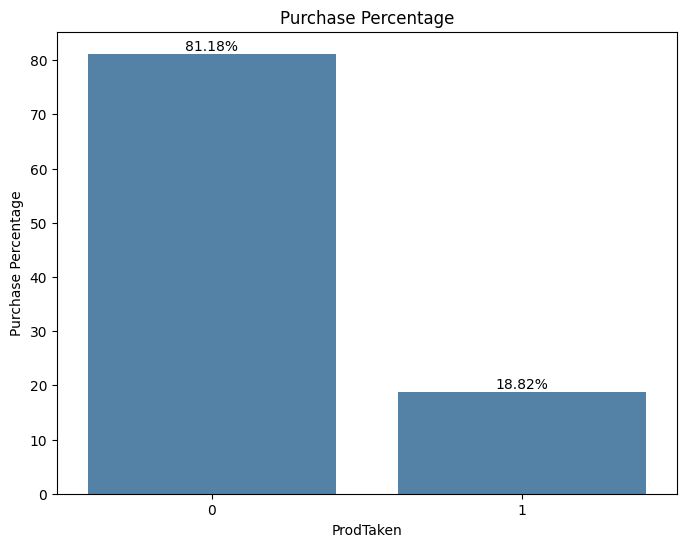

In [18]:
# Calculate the purchase percentage by Passport
purchase_percentage = df.groupby('ProdTaken').size() / len(df) * 100

# Plot the purchase percentage
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=purchase_percentage.index, y=purchase_percentage.values, color='steelblue')
plt.xlabel('ProdTaken')
plt.ylabel('Purchase Percentage')
plt.title('Purchase Percentage')

# Display percentages on the bars
for i, value in enumerate(purchase_percentage):
    ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.show()

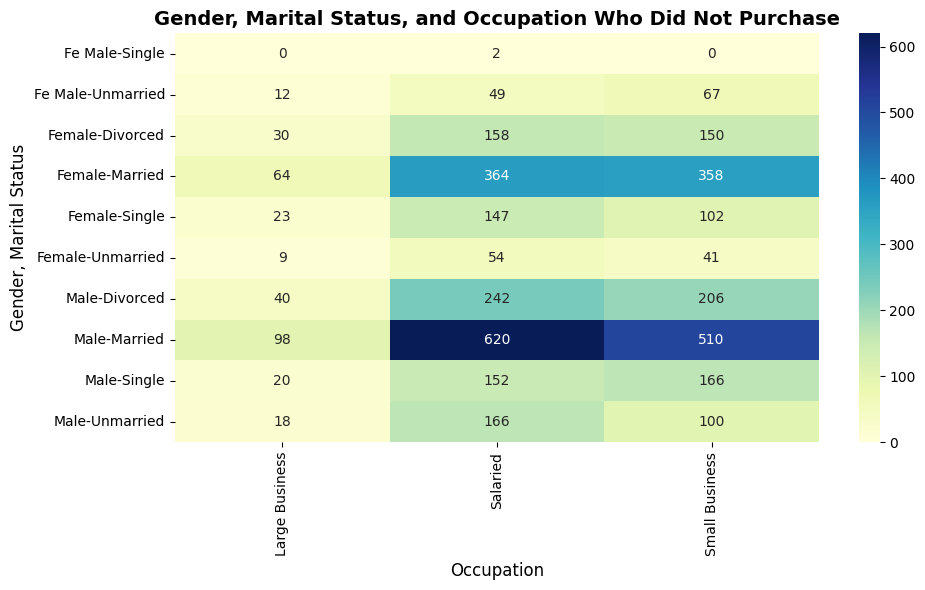

In [19]:
# Select the relevant columns for analysis
selected_columns = ['Gender', 'MaritalStatus', 'Occupation', 'ProdTaken']  # Modify with the desired columns
data = df[selected_columns]

# Filter only rows where product was taken (ProdTaken = 0)
data = data[data['ProdTaken'] == 0]

# Create cross-tabulation table
cross_tab = pd.crosstab(index=[data['Gender'], data['MaritalStatus']], columns=data['Occupation'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Gender, Marital Status', fontsize=12)
plt.title('Gender, Marital Status, and Occupation Who Did Not Purchase', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

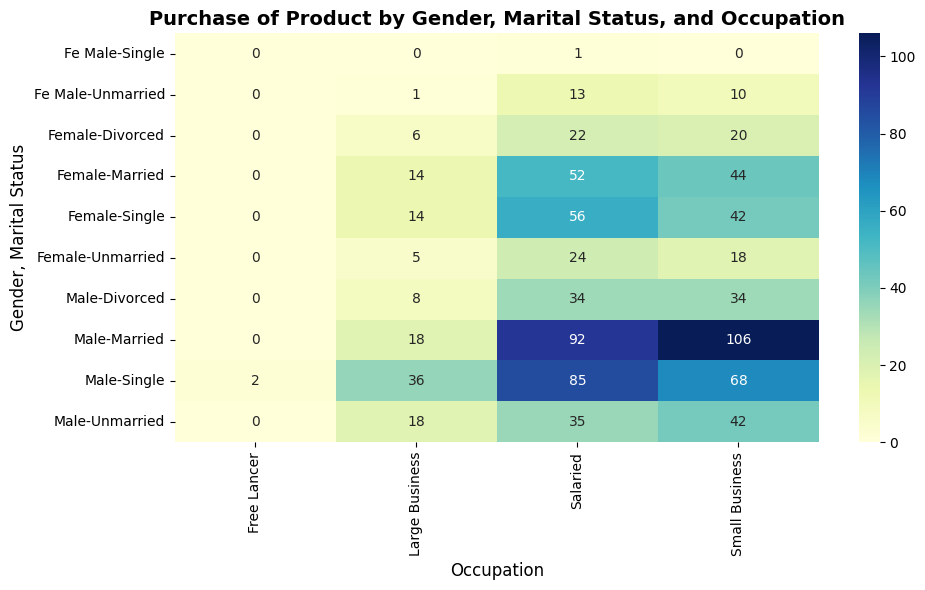

In [20]:
# Select the relevant columns for analysis
selected_columns = ['Gender', 'MaritalStatus', 'Occupation', 'ProdTaken']  # Modify with the desired columns
data = df[selected_columns]

# Filter only rows where product was taken (ProdTaken = 1)
data = data[data['ProdTaken'] == 1]

# Create cross-tabulation table
cross_tab = pd.crosstab(index=[data['Gender'], data['MaritalStatus']], columns=data['Occupation'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Gender, Marital Status', fontsize=12)
plt.title('Purchase of Product by Gender, Marital Status, and Occupation', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

1. Berdasarkan visualisasi diatas, kebanyakan produk dibeli oleh laki-laki, sudah menikah dan wiraswasta



2. Berdasarkan visualisasi diatas, mayoritas yang tidak membeli produk adalah laki-laki yang sudah menikah dan bekerja sebagai karyawan, sedangkan mayoritas yang membeli produk adalah laki-laki yang sudah menikah dan seorang wiraswasta.


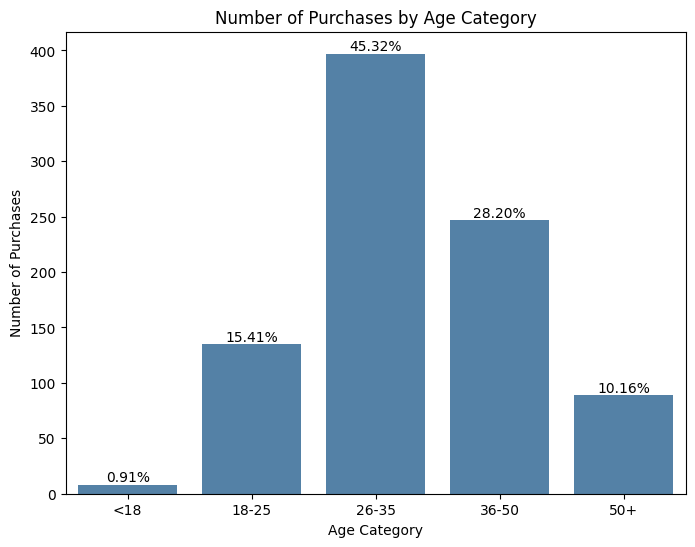

In [21]:
# Segment age into categories
df['AgeCategory'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 100], labels=['<18', '18-25', '26-35', '36-50', '50+'])

# Count the number of purchases by age category
purchase_counts = df.groupby('AgeCategory')['ProdTaken'].sum().reset_index()

# Calculate the total purchases
total_purchases = purchase_counts['ProdTaken'].sum()

# Calculate the percentage of purchases by age category
purchase_counts['Percentage'] = purchase_counts['ProdTaken'] / total_purchases * 100

# Plot the purchase counts by age category
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='AgeCategory', y='ProdTaken', data=purchase_counts, color='steelblue')
plt.xlabel('Age Category')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by Age Category')

# Annotate percentages on the bars
for i, row in purchase_counts.iterrows():
    percentage = row['Percentage']
    ax.annotate(f'{percentage:.2f}%', xy=(i, row['ProdTaken']), ha='center', va='bottom', color='black')

plt.show()
df.drop('AgeCategory', axis=1, inplace=True)

1.  Berdasarkan visualisasi diatas, pembeli produk rata-rata berumur 26-50

Karena mayoritas yang membeli produk adalah anak muda, maka kita bisa memaksimalkan promosi melalui media sosial seperti Instagram, Tiktok, Ataupun Facebook dimana mayoritas penggunanya adalah anak muda

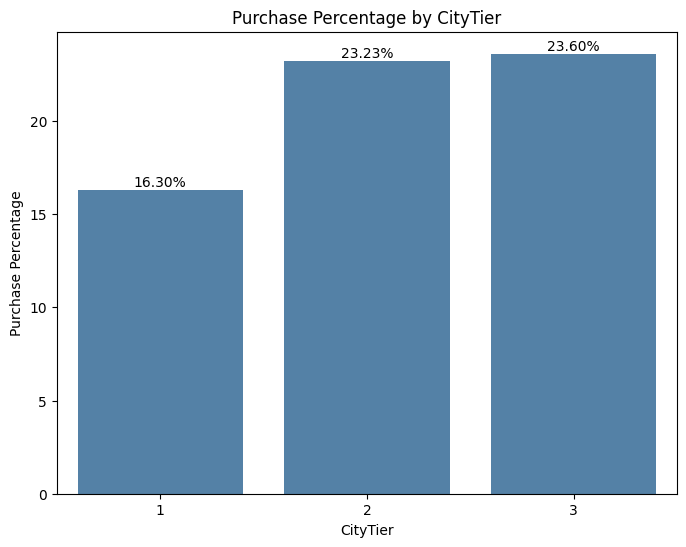

In [22]:
# Calculate the purchase percentage by CityTier
purchase_percentage = df.groupby('CityTier')['ProdTaken'].mean() * 100

# Plot the purchase percentage by CityTier
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=purchase_percentage.index, y=purchase_percentage.values, color='steelblue')
plt.xlabel('CityTier')
plt.ylabel('Purchase Percentage')
plt.title('Purchase Percentage by CityTier')

# Display percentages on the bars
for i, value in enumerate(purchase_percentage):
    ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.show()

1. Berdasarkan visualisasi diatas, kebanyakan transaksi dilakukan oleh pelanggan yang berasal dari CityTier 2 dan 3

Karena kebanyakan pembeli tinggal dilingkungan kota yang sudah maju atau juga tinggal di kota satelit maka kita dapat mengkampanyekan banyak produk di area tersebut mengingat daya beli mereka yang cukup tinggi.

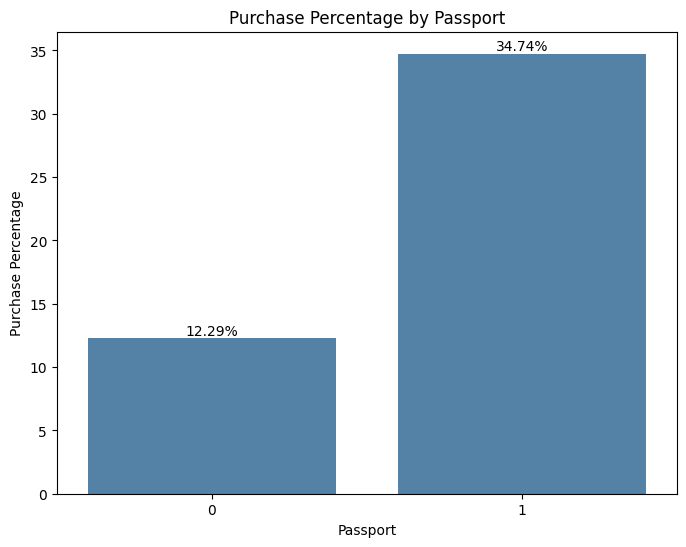

In [23]:
# Calculate the purchase percentage by CityTier
purchase_percentage = df.groupby('Passport')['ProdTaken'].mean() * 100

# Plot the purchase percentage by CityTier
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=purchase_percentage.index, y=purchase_percentage.values, color='steelblue')
plt.xlabel('Passport')
plt.ylabel('Purchase Percentage')
plt.title('Purchase Percentage by Passport')

# Display percentages on the bars
for i, value in enumerate(purchase_percentage):
    ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.show()

1. Berdasarkan visualisasi diatas, kebanyakan transaksi dilakukan oleh orang yang memiliki passport.

Kita bisa menawarkan jasa pembuatan pasport sebagai bundling product ketika melakukan promosi paket travel.

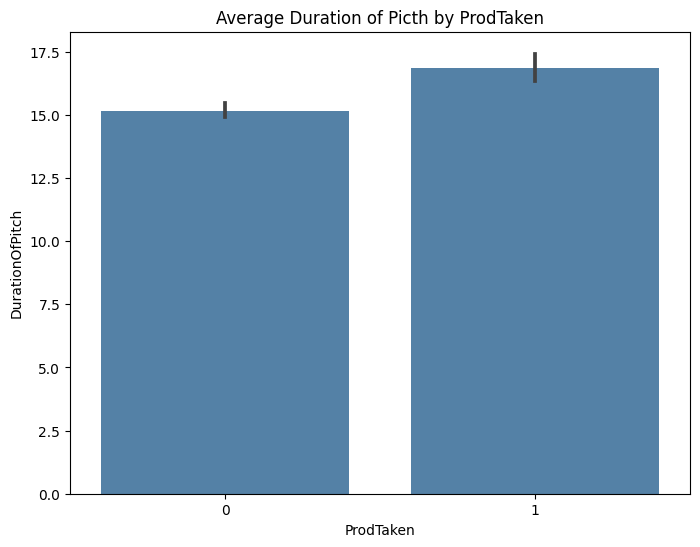

In [24]:
# Plot the Average Duration of Picth by ProdTaken
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='ProdTaken', y='DurationOfPitch', data=df,color='steelblue')
plt.xlabel('ProdTaken')
plt.ylabel('DurationOfPitch')
plt.title('Average Duration of Picth by ProdTaken')


plt.show()

Dapat dilihat bahwa rata-rata durasi pitching customer yang membeli paket hanya sedikit lebih tinggi daripada rata-rata durasi pitching customer yang tidak membeli.

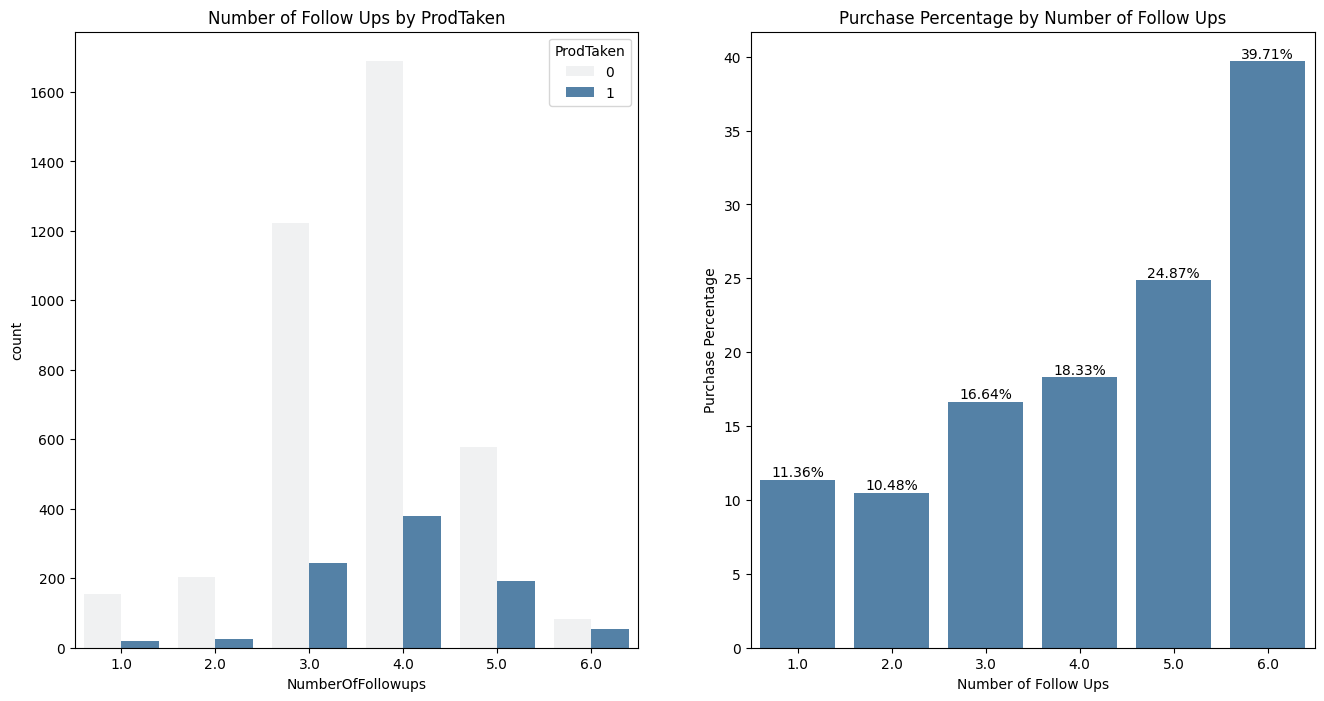

In [25]:
# Plot the Number of Follow Ups by ProdTaken
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
sns.countplot(x='NumberOfFollowups', data=df,hue='ProdTaken', color='steelblue',ax=ax1)
plt.xlabel('NumberOfFollowups')
ax1.title.set_text('Number of Follow Ups by ProdTaken')

# Calculate the purchase percentage by CityTier
purchase_percentage = df.groupby('NumberOfFollowups')['ProdTaken'].mean() * 100

# Plot the purchase percentage by Number of Follow Ups
sns.barplot(x=purchase_percentage.index, y=purchase_percentage.values, color='steelblue',ax=ax2)
plt.xlabel('Number of Follow Ups')
plt.ylabel('Purchase Percentage')
ax2.title.set_text('Purchase Percentage by Number of Follow Ups')

# Display percentages on the bars
for i, value in enumerate(purchase_percentage):
    ax2.text(i, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.show()

Dari visualisasi di atas dapat dilihat bahwa total follow up kurang dari 6 kali memiliki total customer yang tidak membeli jauh lebih tinggi dibandingkan customer yang di-follow up sebanyak 6 kali dengan conversion rate tertinggi yaitu 39,71%.

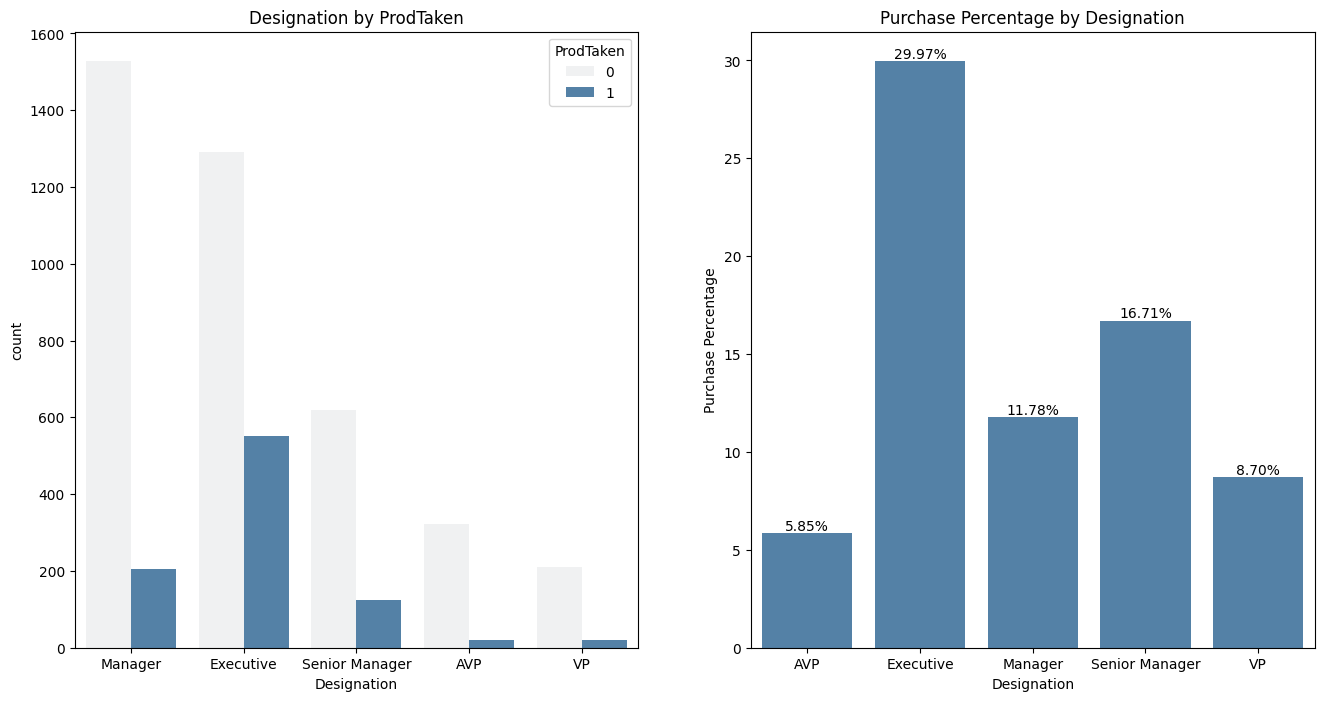

In [26]:
# Plot the Designation by ProdTaken
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
sns.countplot(x='Designation', data=df,hue='ProdTaken', color='steelblue',ax=ax1)
plt.xlabel('Designation')
ax1.title.set_text('Designation by ProdTaken')

# Calculate the purchase percentage by CityTier
purchase_percentage = df.groupby('Designation')['ProdTaken'].mean() * 100

# Plot the purchase percentage by Designation
sns.barplot(x=purchase_percentage.index, y=purchase_percentage.values, color='steelblue',ax=ax2)
plt.xlabel('Designation')
plt.ylabel('Purchase Percentage')
ax2.title.set_text('Purchase Percentage by Designation')

# Display percentages on the bars
for i, value in enumerate(purchase_percentage):
    ax2.text(i, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.show()

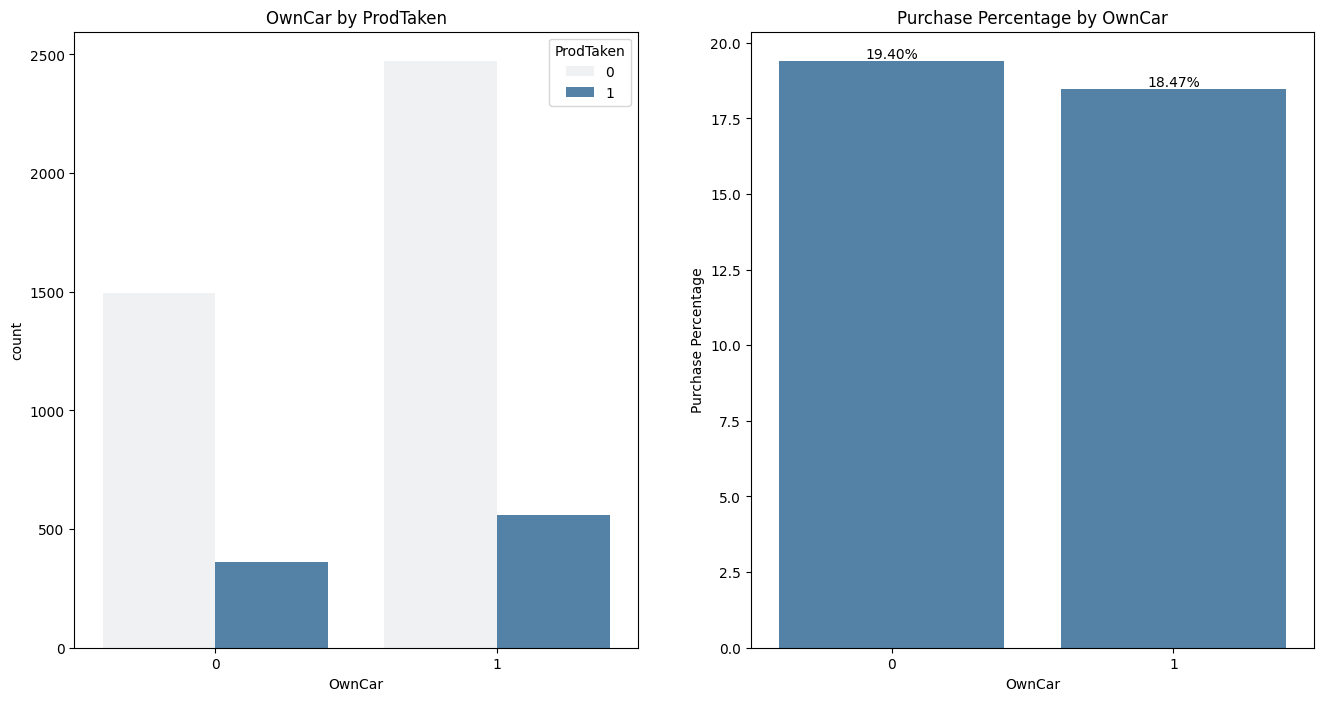

In [27]:
# Plot the OwnCar by ProdTaken
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
sns.countplot(x='OwnCar', data=df,hue='ProdTaken', color='steelblue',ax=ax1)
plt.xlabel('OwnCar')
ax1.title.set_text('OwnCar by ProdTaken')

# Calculate the purchase percentage by CityTier
purchase_percentage = df.groupby('OwnCar')['ProdTaken'].mean() * 100

# Plot the purchase percentage by OwnCar
sns.barplot(x=purchase_percentage.index, y=purchase_percentage.values, color='steelblue',ax=ax2)
plt.xlabel('OwnCar')
plt.ylabel('Purchase Percentage')
ax2.title.set_text('Purchase Percentage by OwnCar')

# Display percentages on the bars
for i, value in enumerate(purchase_percentage):
    ax2.text(i, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.show()

# Data Preprocessing

## Handling missing value

In [28]:
df_copy = df.copy()

In [29]:
# Cek jumlah missing value dalam setiap kolom
missing_values = df_copy.isnull().sum()
print(missing_values)

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64


### Opsi 1: Mean and Median

In [30]:
df_mv1 = df.copy()

Berdasarkan pengamatan EDA maka:
*   Kolom **Age** akan diisi dengan nilai mean
*   Kolom **DurationOfPitch** karena skewed atau terdapat outlier akan diisi oleh nilai median
*   Kolom **NumberOfFollowups** akan diisi oleh nilai mean
*   Kolom **PreferredPropertyStar** akan diisi oleh nilai mean
*   Kolom **NumberOfTrips** karena skewed atau terdapat outlier maka akan diisi oleh median
*   Kolom **NumberOfChildrenVisiting** akan diisi oleh nilai mean
*   Kolom **MonthlyIncome** karena skewed atau terdapat outlier maka diisi oleh nilai median
*   Kolom **TypeofContact** karena bertipe kategori maka akan diisi oleh nilai modus











In [31]:
# Mengisi kolom numerik dengan nilai mean & median
df_mv1['Age'].fillna(df_mv1['Age'].mean(), inplace=True)
df_mv1['DurationOfPitch'].fillna(df_mv1['DurationOfPitch'].median(), inplace=True)
df_mv1['NumberOfFollowups'].fillna(df_mv1['NumberOfFollowups'].mean(), inplace=True)
df_mv1['PreferredPropertyStar'].fillna(df_mv1['PreferredPropertyStar'].mean(), inplace=True)
df_mv1['NumberOfTrips'].fillna(df_mv1['NumberOfTrips'].median(), inplace=True)
df_mv1['NumberOfChildrenVisiting'].fillna(df_mv1['NumberOfChildrenVisiting'].mean(), inplace=True)
df_mv1['MonthlyIncome'].fillna(df_mv1['MonthlyIncome'].median(), inplace=True)

# Mengisi kolom kategorik dengan nilai modus
df_mv1['TypeofContact'].fillna(df_mv1['TypeofContact'].mode()[0], inplace=True)

In [32]:
df_mv1.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Opsi 2: Mean and Zero Imputation

In [33]:
df_mv2 = df.copy()

untuk kolom Age, PrefferedPropertyStar, dan MonthlyIncome mengisi data kosong dengan rata - rata karena merupakan nilai numerik absolut

In [34]:
df_mv2['Age'].fillna(df_mv2['Age'].mean(), inplace=True)
df_mv2['PreferredPropertyStar'].fillna(df_mv2['PreferredPropertyStar'].mean(), inplace=True)
df_mv2['MonthlyIncome'].fillna(df_mv2['MonthlyIncome'].mean(), inplace=True)

untuk kolom NumberOfTrips, NumberOfChildrenVisiting, NumberOfFollowups, dan DurationOfPitch mengunakan nilai 0 untuk mengisi data kosong dikarenakan kemungkinan kekosongan diakibatkan customer melakukan itu sebanyak 0 kali

In [35]:
df_mv2['NumberOfTrips'].fillna(0, inplace=True)
df_mv2['NumberOfChildrenVisiting'].fillna(0, inplace=True)
df_mv2['NumberOfFollowups'].fillna(0, inplace=True)
df_mv2['DurationOfPitch'].fillna(0, inplace=True)

untuk kolom TypeofContact, menggunakan modus untuk mengisi data kosong dikarenakan termasuk data kategorik

In [36]:
df_mv2['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)

In [37]:
# Cek jumlah missing value dalam setiap kolom setelah pengisian nilai hilang
df_mv2.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Opsi 3: KNN Imputer

In [38]:
df_mv3 = df.copy()
col_to_impute = ['Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome']

In [39]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df_mv3[col_to_impute] = pd.DataFrame(imputer.fit_transform(df_mv3[col_to_impute]),columns = df_mv3[col_to_impute].columns)

In [40]:
df_mv3['TypeofContact'].fillna(df_mv3['TypeofContact'].mode()[0], inplace=True)

In [41]:
df_mv3.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Opsi 4: MICE

Opsi yang kami ambil untuk handle missing value adalah menggunakan metode MICE karena imputasi dilakukan menggunakan model regresi.

In [42]:
#df_mv4 = df.copy()
col_to_impute = ['Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome']

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=100, max_iter=10)
#df_mv4[col_to_impute] = imputer.fit_transform(df_mv4[col_to_impute])
df_copy[col_to_impute] = imputer.fit_transform(df_copy[col_to_impute])

In [44]:
#df_mv4['TypeofContact'].fillna(df_mv4['TypeofContact'].mode()[0], inplace=True)
df_copy['TypeofContact'].fillna(df_copy['TypeofContact'].mode()[0], inplace=True)

In [45]:
#df_mv4.isnull().sum()
df_copy.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

Setelah dilakukan proses imputasi untuk missing values menggunakan metode MICE, dataset sudah tidak ada kolom yang kosong.

## Handling Invalid Values

Berdasarkan hasil pengamatan EDA:
*   Terdapat kesalahan pada penulisan kolom Gender dimana "Fe Male" bermakna sama dengan "Female". Maka "Female" akan direplace menjadi "Female"
*   Terdapat penggunaan istilah yang berbeda pada kolom Marital status yaitu "Unmarried" dan "Single" dimana kedua status tersebut bermakna sama. Maka "Unmarried" akan direplace menjadi "Single"

In [46]:
#Terdapat kesalahan penulisan pada kolom Gender dimana 'Fe Male' seharusnya 'Female'
df_copy['Gender'] = df_copy['Gender'].replace({'Fe Male': 'Female'})

#Terdapat penggunaan istilah yang berbeda pada 'Unmarried' dan 'Single' dimana kedua status itu sama
df_copy['MaritalStatus'] = df_copy['MaritalStatus'].replace({'Unmarried': 'Single'})

## Handling Duplicated Data

In [47]:
#Cek duplicate value untuk customer id
df_copy.duplicated(subset=['CustomerID']).sum()

0

Berdasarkan hasil pemeriksaan di atas, tidak terdapat data customer id yang terduplikasi

In [48]:
# remove CustomerID to see duplicate rows
df_copy.drop('CustomerID', axis=1, inplace=True)
print(f'Jumlah baris data sebelum dilakukan penghapusan data duplikat adalah {df_copy.shape[0]}')

# remove duplicate rows
df_copy.drop_duplicates(inplace=True)
print(f'Jumlah baris data setelah dilakukan penghapusan data duplikat adalah {df_copy.shape[0]}')

Jumlah baris data sebelum dilakukan penghapusan data duplikat adalah 4888
Jumlah baris data setelah dilakukan penghapusan data duplikat adalah 4747


## Handling Outlier

### Opsi 1: IQR #####

In [49]:
df_out1 = df_copy.copy()

In [50]:
# Menampilkan jumlah baris sebelum memfilter outlier
print(f'Jumlah baris sebelum memfilter outlier adalah {df_out1.shape[0]}')

# Memfilter outlier menggunakan IQR
skewed_cols = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
for col in skewed_cols:
    Q1 = df_out1[col].quantile(0.25)
    Q3 = df_out1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out1 = df_out1[(df_out1[col] >= lower_bound) & (df_out1[col] <= upper_bound)]

# Menampilkan jumlah baris setelah memfilter outlier
print(f'Jumlah baris setelah memfilter outlier adalah {df_out1.shape[0]}')

Jumlah baris sebelum memfilter outlier adalah 4747
Jumlah baris setelah memfilter outlier adalah 4192


### Opsi 2: Z-Score

Karena keterbatasan data, metode yang kami pakai untuk handling outlier adalah Z-Score.

In [51]:
# view total rows before filtered
print(f'Jumlah baris sebelum memfilter outlier adalah {df_copy.shape[0]}')

# handle outlier using z-score
filtered_entries = np.array([True] * len(df_copy))
skewed_cols = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
for col in skewed_cols:
    zscore = abs(stats.zscore(df_copy[col]))
    filtered_entries = (zscore < 3) & filtered_entries

# view total rows after filtered
df_copy = df_copy[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier adalah {df_copy.shape[0]}')

Jumlah baris sebelum memfilter outlier adalah 4747
Jumlah baris setelah memfilter outlier adalah 4737


## Feature Engineering

### Feature Extraction

Pada feature extraction kita akan menggabungkan kolom NumberOfPersonVisiting dan NumberOfChildrenVisting menjadi kolom baru yaitu TotalVisiting.

In [52]:
# Merge column NumberOfPersonVisiting & NumberOfChildrenVisiting

df_copy['TotalVisiting'] = df_copy['NumberOfPersonVisiting'] + df_copy['NumberOfChildrenVisiting']

<ipython-input-52-ef1a4e286030>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['TotalVisiting'] = df_copy['NumberOfPersonVisiting'] + df_copy['NumberOfChildrenVisiting']


### Feature Transformation ####

Berdasarkan insight yang kita dapat dari EDA, ada beberapa fitur yang berkorelasi dengan target tapi belum berdistribusi normal atau skew positif. Maka kita lakukan log Transformasi atau Standardizing agar distribusi nya normal/ mendekati normal.

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

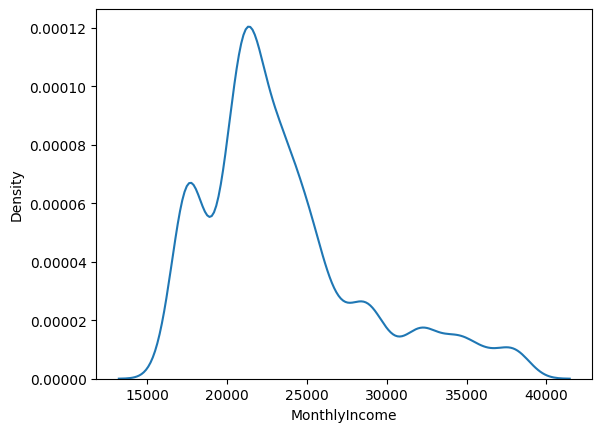

In [53]:
# Distribusi MonthlyIncome (nilai asli)
sns.kdeplot(df_copy['MonthlyIncome'])

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

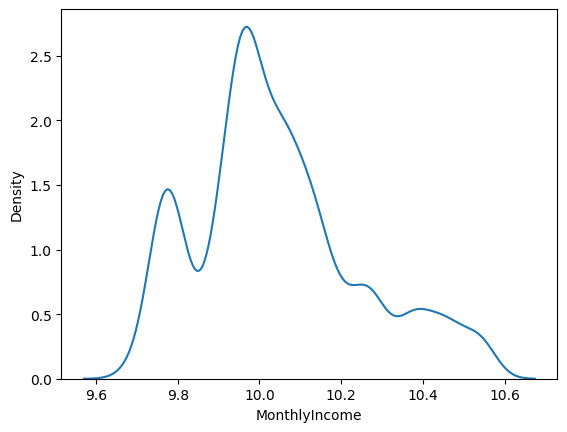

In [54]:
# Distribusi MonthlyIncome(Setelah Log Transformation)
sns.kdeplot(np.log(df_copy['MonthlyIncome']))

In [55]:
# kita transformasi
df_copy['log_MonthlyIncome']= np.log(df_copy['MonthlyIncome'])

In [56]:
# drop kolom monthlyincome (nilai asli)
df_copy= df_copy.drop(columns='MonthlyIncome')

<Axes: xlabel='Age', ylabel='Density'>

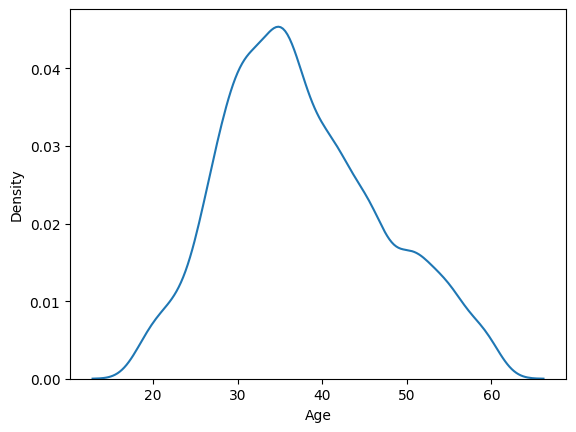

In [57]:
# Distribusi Age (nilai asli)
sns.kdeplot(df['Age'])

<Axes: xlabel='stand_Age', ylabel='Density'>

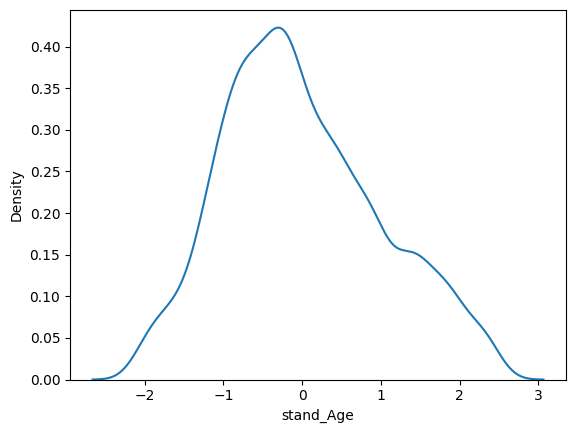

In [58]:
#karena distribusi sudah normal maka dilakukan standardisasi
df['stand_Age']=StandardScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
sns.kdeplot(df['stand_Age'])

In [59]:
# drop kolom age (nilai asli)
df_copy= df_copy.drop(columns='Age')

<Axes: xlabel='DurationOfPitch', ylabel='Density'>

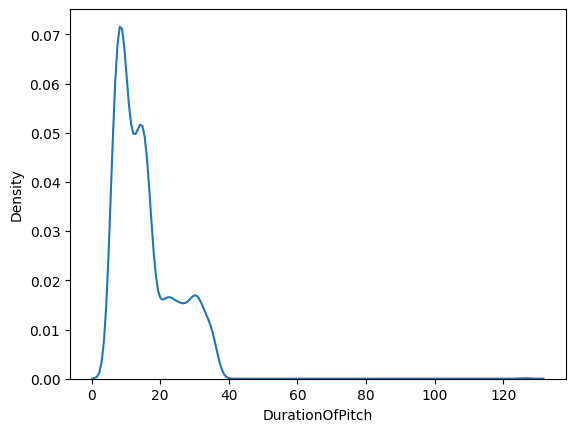

In [60]:
# Distribusi DurationOfPitch (nilai asli)
sns.kdeplot(df['DurationOfPitch'])

<Axes: xlabel='stand_DurationOfPitch', ylabel='Density'>

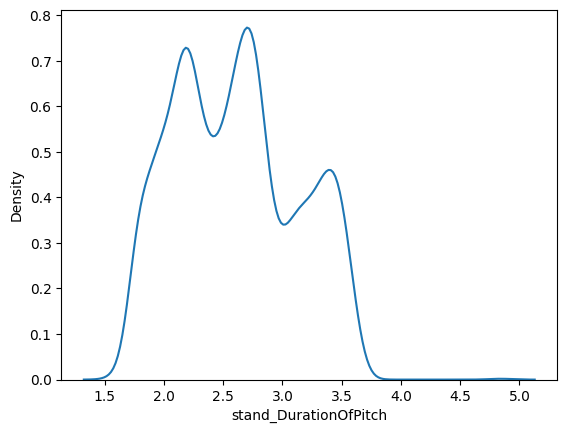

In [61]:
#Distribusi DurationOfPitch (Setelah Log Transformation)
df['stand_DurationOfPitch']=np.log(df['DurationOfPitch'])
sns.kdeplot(df['stand_DurationOfPitch'])

### Feature Encoding

Pada Feature Encoding categorical kita menggunakan librari LabelEncoder bawaan dari sklearn

In [62]:
cat_cols = df_copy.select_dtypes(include='object').columns.tolist()

In [63]:
for col in cat_cols:
    print(f'''Value count kolom {col}:''')
    print(df_copy[col].value_counts())
    print()

Value count kolom TypeofContact:
Self Enquiry       3371
Company Invited    1366
Name: TypeofContact, dtype: int64

Value count kolom Occupation:
Salaried          2287
Small Business    2028
Large Business     420
Free Lancer          2
Name: Occupation, dtype: int64

Value count kolom Gender:
Male      2829
Female    1908
Name: Gender, dtype: int64

Value count kolom ProductPitched:
Basic           1794
Deluxe          1680
Standard         714
Super Deluxe     324
King             225
Name: ProductPitched, dtype: int64

Value count kolom MaritalStatus:
Married     2277
Single      1512
Divorced     948
Name: MaritalStatus, dtype: int64

Value count kolom Designation:
Executive         1794
Manager           1680
Senior Manager     714
AVP                324
VP                 225
Name: Designation, dtype: int64



In [64]:
# Encoding categorical using library LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_copy.Occupation=encoder.fit_transform(df_copy.Occupation)
df_copy.Designation=encoder.fit_transform(df_copy.Designation)
df_copy.ProductPitched=encoder.fit_transform(df_copy.ProductPitched)
df_copy.sample(10, random_state=50)

,ProdTaken,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,TotalVisiting,log_MonthlyIncome
0,1,Self Enquiry,3,6.0,2,Female,3,3.0,1,3.0,Single,1.000000,1,2,1,0.0,2,3.0,9.951944
2956,0,Self Enquiry,1,10.0,3,Male,3,5.0,0,3.0,Single,2.000000,0,2,0,1.0,1,4.0,9.938999
4229,0,Company Invited,1,17.0,2,Female,3,4.0,0,3.0,Single,2.000000,0,5,0,1.0,1,4.0,9.958591
4881,1,Self Enquiry,2,25.0,2,Male,3,2.0,0,5.0,Married,2.000000,0,1,1,2.0,1,5.0,9.955368
3468,0,Self Enquiry,1,9.0,3,Female,3,4.0,4,3.0,Divorced,3.723742,0,5,1,1.0,0,4.0,10.487015
907,0,Self Enquiry,3,11.0,3,Male,2,3.0,2,4.0,Divorced,1.000000,0,5,1,1.0,4,3.0,10.410697
2326,0,Self Enquiry,1,5.0,2,Male,2,4.0,0,3.0,Single,2.000000,0,3,0,0.0,1,2.0,9.799959
1034,0,Self Enquiry,1,26.0,3,Male,3,5.0,3,5.0,Married,3.000000,1,3,0,0.0,3,3.0,10.160105
4831,1,Self Enquiry,1,24.0,2,Female,3,4.0,0,3.0,Single,3.000000,1,5,1,1.0,1,4.0,10.052597
2102,0,Company Invited,1,8.0,3,Male,2,3.0,0,3.0,Single,6.000000,1,1,1,1.0,1,3.0,9.770813


In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Creating instance of OneHotEncoder
encoder = OneHotEncoder()

# Define the columns to be one-hot encoded
columns_to_encode = ['Gender', 'TypeofContact', 'MaritalStatus']

# Create the ColumnTransformer
ct = ColumnTransformer([('encoder', encoder, columns_to_encode)], remainder='passthrough')

# Apply one-hot encoding to the selected columns
encoded_data = ct.fit_transform(df_copy)

# Create a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data)

# Update column names for one-hot encoded columns
encoded_columns = ct.named_transformers_['encoder'].get_feature_names_out(columns_to_encode)
new_columns = list(encoded_columns) + list(df_copy.columns.drop(columns_to_encode))
encoded_df.columns = new_columns

# Update df_copy with the encoded DataFrame
df_copy = encoded_df

# Display the resulting dataset
df_copy

,Gender_Female,Gender_Male,TypeofContact_Company Invited,TypeofContact_Self Enquiry,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,ProdTaken,CityTier,DurationOfPitch,...,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,TotalVisiting,log_MonthlyIncome
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,6.0,...,1.0,3.0,1.0,1.0,2.0,1.0,0.0,2.0,3.0,9.951944
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,14.0,...,1.0,4.0,2.0,0.0,3.0,1.0,2.0,2.0,5.0,9.909967
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,8.0,...,0.0,3.0,7.0,1.0,3.0,0.0,0.0,1.0,3.0,9.746249
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,...,0.0,3.0,2.0,1.0,5.0,1.0,1.0,1.0,3.0,9.793059
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,8.0,...,0.0,4.0,1.0,0.0,5.0,1.0,0.0,1.0,2.0,9.823795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,9.0,...,1.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0,10.187764
4733,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,31.0,...,0.0,3.0,3.0,1.0,3.0,1.0,2.0,1.0,6.0,9.962322
4734,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,17.0,...,3.0,4.0,7.0,0.0,1.0,1.0,3.0,3.0,7.0,10.367850
4735,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,16.0,...,0.0,3.0,3.0,0.0,5.0,0.0,2.0,1.0,5.0,9.917834


In [66]:
df_copy.isnull().sum()

Gender_Female                    0
Gender_Male                      0
TypeofContact_Company Invited    0
TypeofContact_Self Enquiry       0
MaritalStatus_Divorced           0
MaritalStatus_Married            0
MaritalStatus_Single             0
ProdTaken                        0
CityTier                         0
DurationOfPitch                  0
Occupation                       0
NumberOfPersonVisiting           0
NumberOfFollowups                0
ProductPitched                   0
PreferredPropertyStar            0
NumberOfTrips                    0
Passport                         0
PitchSatisfactionScore           0
OwnCar                           0
NumberOfChildrenVisiting         0
Designation                      0
TotalVisiting                    0
log_MonthlyIncome                0
dtype: int64

In [67]:
# Cek after encoding categorical
df_copy.sample(5)

,Gender_Female,Gender_Male,TypeofContact_Company Invited,TypeofContact_Self Enquiry,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,ProdTaken,CityTier,DurationOfPitch,...,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,TotalVisiting,log_MonthlyIncome
2952,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,16.0,...,0.0,4.0,3.0,0.0,5.0,1.0,1.0,1.0,4.0,9.969837
4645,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,9.0,...,1.0,3.0,6.0,1.0,5.0,1.0,1.0,2.0,4.0,10.072217
414,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,8.0,...,2.0,3.0,1.0,0.0,3.0,0.0,0.0,4.0,3.0,10.405504
2267,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,25.0,...,0.0,5.0,2.0,0.0,3.0,1.0,1.0,1.0,4.0,9.808957
1504,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,6.0,...,1.0,5.0,3.0,0.0,3.0,0.0,1.0,2.0,3.0,9.922113


### Feature Selection ###

#### Opsi 1: ANOVA ####

In [68]:
# separate feature and target
X = df_copy.drop(['ProdTaken'], axis=1, inplace=False)
y = df_copy['ProdTaken'].values

In [69]:
# import library
from sklearn.feature_selection import f_regression, SelectKBest

# Applying SelectKBest class to extract top 10 best features
fs = SelectKBest(score_func=f_regression,k=10)
# Applying feature selection
fit = fs.fit(X,y)

In [70]:

features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(15,columns="F_Score"))

                   Input_Features     F_Score
15                       Passport  349.887262
6            MaritalStatus_Single  189.338584
12                 ProductPitched  131.313478
21              log_MonthlyIncome   91.005589
5           MaritalStatus_Married   73.987553
11              NumberOfFollowups   62.739475
13          PreferredPropertyStar   44.675740
19                    Designation   43.418107
7                        CityTier   36.756101
8                 DurationOfPitch   29.824237
4          MaritalStatus_Divorced   25.768527
16         PitchSatisfactionScore   12.767022
2   TypeofContact_Company Invited    8.149897
3      TypeofContact_Self Enquiry    8.149897
9                      Occupation    7.903596


Hasil F_Score dari metode ANOVA menunjukkan bahwa tidak ada fitur yang terlalu dominan sehingga relatif terdistribusi.

#### Opsi 2 : Random Forest Feature Performance

In [71]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

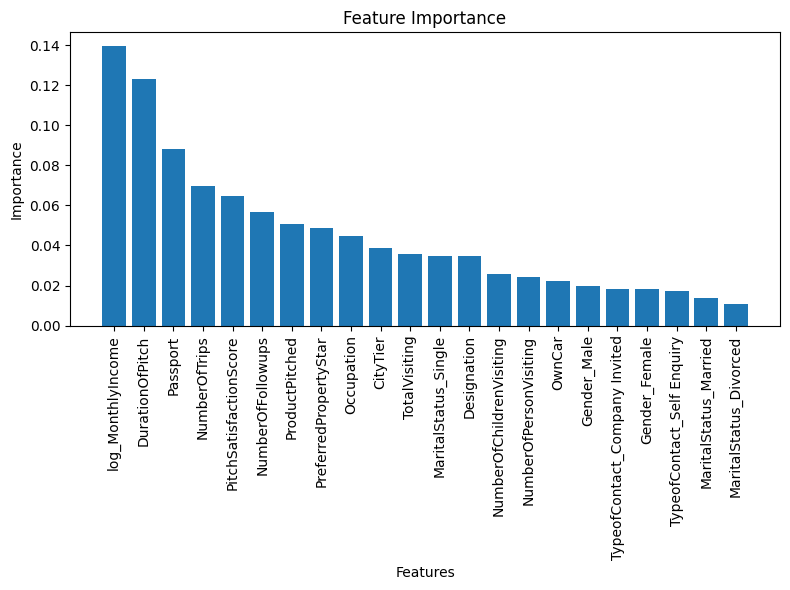

In [72]:
# Train Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Extract feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = feature_names[indices]

# Plot feature importances as a histogram
plt.figure(figsize=(8, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Hasil Feature Performance dari metode Random Forest menunjukkan bahwa tidak ada fitur yang terlalu dominan sehingga relatif terdistribusi.

Karena dari dua metode tersebut semua fitur relatif terdistribusi maka kami menggunakan semua kolom sebagai fitur.

## Declaring features and target variable

In [73]:
# separate feature and target
X = df_copy.drop(['ProdTaken','DurationOfPitch','NumberOfFollowups','ProductPitched','PitchSatisfactionScore'], axis=1, inplace=False)
y = df_copy['ProdTaken'].values

## Split the data into train & test set with 70:30 ratio

In [74]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [75]:
# check the shape of X_train and X_test

print(f'Jumlah data latih terdiri dari {len(X_train)} baris')
print(f'Jumlah data uji terdiri dari {len(X_test)} baris')

Jumlah data latih terdiri dari 3315 baris
Jumlah data uji terdiri dari 1422 baris


## Handling Imbalance

Perlu dilakukan oversampling karena terdapat ketimpangan pada kolom target. Oversampling akan dilakukan menggunakan metode SMOTE.

In [76]:
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(random_state=40).fit_resample(X_train, y_train)
print(X_over_SMOTE.shape)
print(y_over_SMOTE.shape)

(5382, 18)
(5382,)


In [77]:
print('Original')
print(pd.Series(y_train).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0.0    2691
1.0     624
dtype: int64


SMOTE
0.0    2691
1.0    2691
dtype: int64


In [78]:
X_train = X_over_SMOTE
y_train = y_over_SMOTE

Setelah dilakukan oversampling menggunakan SMOTE maka dapat dilihat bahwa jumlah data pada target sudah terdistrbusi secara merata, oleh karena itu siap untuk dilakukan pemodelan.

# Modelling

Pada tahap modelling kita akan membandingkan beberapa metode yang nantinya kita akan pilih mana model yang menghasilkan performa terbaik. Model dengan performa terbaik yang nantinya akan kita pilih dalam tahap selanjutnya.

In [79]:
# import library untuk modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from yellowbrick.classifier import DiscriminationThreshold

## Choose Best Classifier

In [80]:
# Model assignment
rfc = RandomForestClassifier(random_state=45)
etc = ExtraTreesClassifier(random_state=45)
gbc = GradientBoostingClassifier(random_state=45)
bgc = BaggingClassifier(random_state=45)
xgb = XGBClassifier(eval_metric='error',random_state=45)
#dtc = DecisionTreeClassifier()
#abc = AdaBoostClassifier()
#knn = KNeighborsClassifier()
#logreg = LogisticRegression()
#nb = GaussianNB()
#svm = SVC()
#mlp = MLPClassifier()

# Assign model to a list
#models = [dtc, rfc, abc, etc, gbc, bgc, knn, logreg, nb, svm, xgb, mlp]
models = [rfc, etc, gbc, bgc, xgb]

model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

In [81]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV

## Cross Validation

Pada tahap ini kita lakukan training pada seluruh data menggunakan cross validation. Hal ini dilakukan untuk memprediksi hasil model yang terbaik dan akan digunakan.

In [82]:
# Cross validation for each model
rfc_score = cross_val_score(models[0], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
etc_score = cross_val_score(models[1], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_val_score(models[2], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
bgc_score = cross_val_score(models[3], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_val_score(models[4], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
#dtc_score = cross_val_score(models[5], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
#abc_score = cross_val_score(models[6], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
#knn_score = cross_val_score(models[7], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
#logreg_score = cross_val_score(models[8], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
#nb_score = cross_val_score(models[9], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
#svm_score = cross_val_score(models[10], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
#mlp_score = cross_val_score(models[11], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished


In [83]:
# List of score per model
#cv_result = [
#    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score,
#    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]
cv_result = [rfc_score, etc_score, gbc_score, bgc_score, xgb_score]

# Create dataframe for score every k-fold
df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

,0,1,2,3,4
RandomForestClassifier,0.887131,0.875527,0.879620,0.869060,0.891235
ExtraTreesClassifier,0.891350,0.879747,0.889124,0.879620,0.900739
GradientBoostingClassifier,0.856540,0.863924,0.865892,0.838437,0.871172
BaggingClassifier,0.904008,0.899789,0.891235,0.876452,0.895459
XGBClassifier,0.895570,0.886076,0.912355,0.883844,0.912355


Indeks 0 - 4 di atas adalah banyaknya percobaan yang dilakukan. Dalam hal ini, kami menggunakan k-fold dengan k = 5 yang artinya melakukan 5 kali percobaan dalam menguji dataset. Hal ini dilakukan agar dapat memprediksi hasil performa model yang terbaik untuk digunakan. Dari hasil tersebut terlihat bahwa `XGBClassifier` memiliki performa yang realtif stabil 0.93... di setiap percobaan sehingga kemungkinan untuk menggunakan XGBClassifier semakin besar. Namun, hasil 5 percobaan di atas nantinya akan dihitung berdasarkan rata-rata setiap model sehingga nantinya model yang memiliki performa terbaik yang akan digunakan.

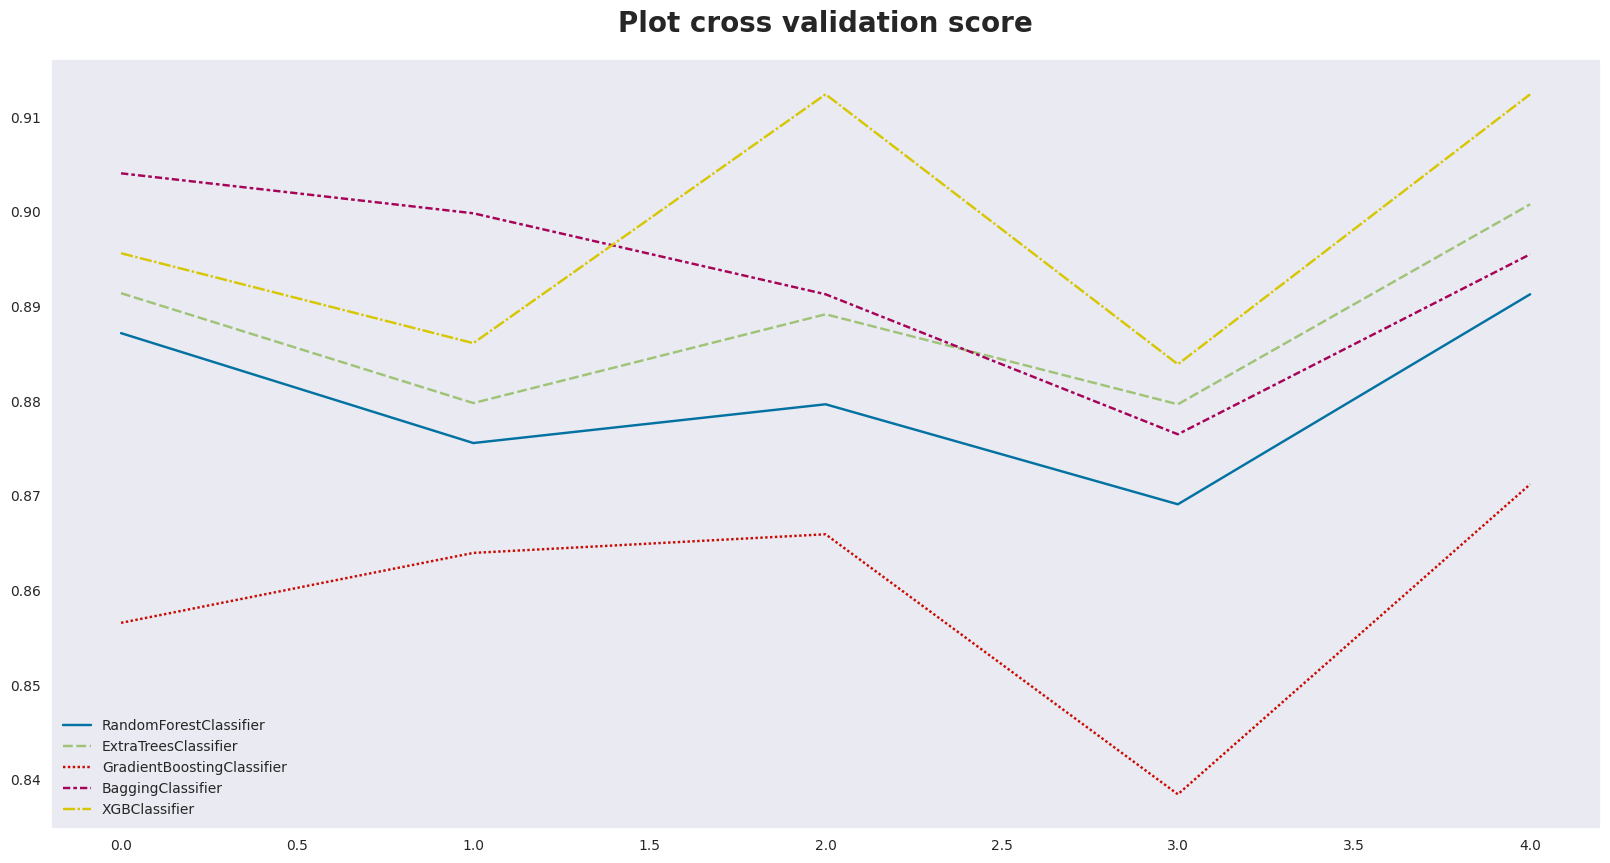

In [84]:
# Plot cross validation score
sns.set_style('dark')
plt.figure(figsize=(20,10))
plt.title('Plot cross validation score',fontsize=20, fontweight='bold', pad=20)
sns.lineplot(data=df_cv_result.T)
plt.show()

In [85]:
# Calculate average for every k-fold validation
cv_mean = []
i = 0
for mean in cv_result:
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1

In [86]:
# Calculate standard deviation for every k-fold validation
cv_std = []
i = 0
for std in cv_result:
    std = cv_result[i].std()
    cv_std.append(std)
    i += 1

In [87]:
# Average and standard deviation score for each model
df_cv = pd.DataFrame({'score_mean':cv_mean, 'score_std':cv_std}, index=model_name).sort_values(['score_mean', 'score_std'], ascending=[False, True])
df_cv

,score_mean,score_std
XGBClassifier,0.898040,0.012334
BaggingClassifier,0.893389,0.009482
ExtraTreesClassifier,0.888116,0.007913
RandomForestClassifier,0.880515,0.007945
GradientBoostingClassifier,0.859193,0.011390


Pada eksperimen diatas didapatkan nilai rata-rata akurasi dan standard deviasinya dari setiap model. Berdasarkan hasil tersebut, XGBClassifier memiliki performa terbaik dengan rata-rata akurasi mencapai 0.898040 dengan standard deviasi 0.012334

## Fit and Evaluation

Selain dengan menggunakan Cross Validation, kami juga melakukan uji nilai
akurasi pada data training dan testing yang bertujuan untuk melihat akurasi saat data dilakukan training dan testing serta melihat perbedaaannya.



In [88]:
# Create a list to assign a model score
train_score = []
test_score = []

# Create dataframe
df_train_test = pd.DataFrame()
for i in models:
    # Fit each model
    model = i.fit(X_train, y_train)
    # accuracy for training set
    train_score.append(model.score(X_train, y_train))
    # accuracy for testing set
    test_score.append(model.score(X_test, y_test))

In [89]:
# Create a dataframe to store accuracy score
df_avg_score = pd.DataFrame({
    'train score':train_score,
    'test score':test_score},
    index=model_name)

# Create a new column for the difference in accuracy score
df_avg_score['difference'] = abs(df_avg_score['train score'] - df_avg_score['test score'])
# Sort accuracy by smallest difference
df_avg_score = df_avg_score.sort_values(['train score', 'test score','difference'], ascending=[False, False, True])
df_avg_score

,train score,test score,difference
ExtraTreesClassifier,1.000000,0.861463,0.138537
RandomForestClassifier,1.000000,0.855837,0.144163
BaggingClassifier,0.995169,0.848101,0.147068
XGBClassifier,0.993125,0.864979,0.128146
GradientBoostingClassifier,0.906540,0.833333,0.073207


Terlihat bahwa `XGBClassifier` memiliki perbedaan nilai akurasi yaitu 13% sehingga kemungkinan `XGBClassifier` bisa digunakan untuk mendapatkan performa yang baik.

Selanjutnya akan dilakukan uji nilai precision, recall, f1-score, dan roc-auc-score pada data training dan testing

In [90]:
# Calculate accuracy, precision, recall, f1-score, and roc-auc-score
def eval(model,X_train,X_test,y_train,y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    train_score = round((model.score(X_train, y_train) * 100), 2)
    test_score = round((model.score(X_test, y_test) * 100), 2)
    prec_score = round((precision_score(y_test, y_pred)) * 100, 2)
    rec_score = round((recall_score(y_test, y_pred)) * 100, 2)
    f1 = round(f1_score(y_test, y_pred)*100, 2)
    train_roc_auc = round((roc_auc_score(y_train, y_pred_proba_train[:, 1]) * 100), 2)
    test_roc_auc = round((roc_auc_score(y_test, y_pred_proba[:, 1]) * 100), 2)

    return (train_score,test_score,prec_score,rec_score,f1,train_roc_auc,test_roc_auc)

A=[]
for i in models:
    A.append(eval(i,X_train,X_test,y_train,y_test))

In [91]:
model_eval = pd.DataFrame(A,index=model_name)
model_eval = model_eval.rename(columns={0: 'Training Accuracy', 1: 'Test Accuracy', 2:'Precision Score', 3:'Recall Score', 4:'F1 Score', 5:'roc_auc (train-proba)', 6:'roc_auc (test-proba)'})
model_eval = model_eval.sort_values(['Precision Score'], ascending=[False])
model_eval = model_eval.reset_index()
model_eval = model_eval.rename(columns={'index': 'Model'})
model_eval


,Model,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score,roc_auc (train-proba),roc_auc (test-proba)
0,ExtraTreesClassifier,100.00,86.15,69.83,46.64,55.93,100.00,85.85
1,RandomForestClassifier,100.00,85.58,68.86,42.91,52.87,100.00,86.58
2,XGBClassifier,99.31,86.50,68.63,52.24,59.32,99.99,87.73
3,BaggingClassifier,99.52,84.81,63.40,45.90,53.25,99.99,86.48
4,GradientBoostingClassifier,90.65,83.33,57.49,44.40,50.11,96.29,82.29


Pada kasus ini selain nilai akurasi yang kita perhitungkan, nilai presisi juga akan kita perhitungkan karena kita lebih ingin model kita memiliki ketepatan memprediksi potential customer sebesar-besarnya. Total Positive (TP) pada kasus ini merupakan total customer yang diprediksi akan mengambil paket dan benar mengambil paket, sedangkan False Positive (FP) pada kasus ini yaitu customer yang diprediksi akan mengambil paket, tetapi sebenarnya tidak mengambil paket. Karena jumlah potential customer tersebut merupakan total customer yang diprediksi akan membeli yaitu TP+FP dan customer yang diprediksi membeli dan benar membeli adalah TP, maka dipilih nilai TP/(TP+FP) atau nilai presisi sebagai indikator evaluasi terbaik untuk model kami. Dapat dilihat bahwa model Random Forest memiliki nilai presisi tertinggi. Akan tetapi, dikarenakan nilai akurasi mencapai 100% dan terindikasi overfitting, maka model XG Boost kami pilih sebagai model yang memiliki hasil evaluasi paling baik.

## Cross Validation for Some Metrics

Mengukur performa model dengan beberapa metrik, yaitu accuracy, precision, recall, dan f1-score.

In [92]:
skfold = StratifiedKFold(n_splits=5)

# Cross validation for each model
rfc_score = cross_validate(models[0], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
etc_score = cross_validate(models[1], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
gbc_score = cross_validate(models[2], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
bgc_score = cross_validate(models[3], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
xgb_score = cross_validate(models[4], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
#dtc_score = cross_validate(models[5], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
#abc_score = cross_validate(models[6], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
#knn_score = cross_validate(models[7], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
#logreg_score = cross_validate(models[8], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
#nb_score = cross_validate(models[9], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
#svm_score = cross_validate(models[10], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
#mlp_score = cross_validate(models[11], X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.5s finished


In [93]:
#cv_result = [
#    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score,
#    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]
cv_result = [rfc_score, etc_score, gbc_score, bgc_score, xgb_score]

# Average score for each metrics

df_cv_result = pd.DataFrame(cv_result, index=model_name).applymap(np.mean)
df_cv_result = df_cv_result.sort_values(['test_accuracy', 'test_precision'], ascending=False)
df_cv_result = df_cv_result.reset_index()
df_cv_result.rename(columns={'index':'Model'}, inplace=True)
df_cv_result

,Model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,ExtraTreesClassifier,0.721526,0.065192,0.940187,0.941889,0.938675,0.937118
1,RandomForestClassifier,0.913286,0.062432,0.925705,0.948799,0.899274,0.913490
2,BaggingClassifier,0.665392,0.074641,0.912325,0.934044,0.886641,0.900328
3,XGBClassifier,1.624374,0.019901,0.904906,0.948345,0.855040,0.874162
4,GradientBoostingClassifier,1.233622,0.015837,0.869416,0.917080,0.812313,0.834286


Dari hasil diatas, `XGBClassifier` memiliki nilai akurasi dan dan recall yang tinggi dari keseluruhan model. Pada kasus ini selain nilai akurasi yang kita perhitungkan, recall juga akan kita perhitungkan karena kita lebih ingin model kita dapat mengklasifikasi lebih banyak False Positive (FP) daripada False Negative (FN). FP pada kasus ini yaitu model memprediksi customer akan mengambil paket, tetapi sebenarnya tidak mengambil paket. Maka FP lebih baik daripada FN. FN yaitu model memprediksi customer tidak mengambil paket tetapi sebenarnya mengambil paket, dan hal ini dapat menyebabkan semakin banyak customer yang tidak bisa kita lakukan penawaran lebih lanjut sehingga mereka tidak akan mengambil paket.

Dari keseluruhan proses diatas, maka kami memilih menggunakan model `XGBClassifier` karena memiliki nilai akurasi dan recall yang tertinggi.

## Using XGB Classifier

Pada tahap ini kita akan melakukan perbandingan performa model sebelum dan sesudah dilakukan hyperparameter tuning.

### Default Parameter

In [94]:
# Fit classifier
xgb.fit(X_train, y_train)

# predict test set
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)
y_pred_proba_train = xgb.predict_proba(X_train)

# Calculate accuracy, precision, recall, and f1-score
train_score = round((xgb.score(X_train, y_train) * 100), 2)
test_score = round((xgb.score(X_test, y_test) * 100), 2)
prec_score = round((precision_score(y_test, y_pred)) * 100, 2)
rec_score = round((recall_score(y_test, y_pred)) * 100, 2)
f1 = round(f1_score(y_test, y_pred)*100, 2)
train_roc_auc = round((roc_auc_score(y_train, y_pred_proba_train[:, 1]) * 100), 2)
test_roc_auc = round((roc_auc_score(y_test, y_pred_proba[:, 1]) * 100), 2)

print('Training Accuracy : {}%'.format(train_score))
print('Test Accuracy : {}%'.format(test_score))
print('Precision Score : {}%'.format(prec_score))
print('Recall Score : {}%'.format(rec_score))
print('F1 Score : {}%'.format(f1))
print('roc_auc (train-proba) : {}%'.format(train_roc_auc))
print('roc_auc (test-proba) : {}%'.format(test_roc_auc))

Training Accuracy : 99.31%
Test Accuracy : 86.5%
Precision Score : 68.63%
Recall Score : 52.24%
F1 Score : 59.32%
roc_auc (train-proba) : 99.99%
roc_auc (test-proba) : 87.73%


In [95]:
pd.DataFrame({
    'train_acc':[train_score],
    'test_acc':[test_score],
    'precision':[prec_score],
    'recall':[rec_score],
    'f1-score':[f1],
    'roc_auc (train-proba)':[train_roc_auc],
    'roc_auc (test-proba)':[test_roc_auc]}, index=['Default XGB'])

,train_acc,test_acc,precision,recall,f1-score,roc_auc (train-proba),roc_auc (test-proba)
Default XGB,99.31,86.5,68.63,52.24,59.32,99.99,87.73


### Hyperparameter Tuning

Hyperparameter Tuning dilakukan untuk memilih parameter terbaik yang akan digunakan. Metode tuning yang digunakan yaitu Random Seach CV. Random Search CV dipilih karena lebih mudah dalam penggunaannya.

In [96]:
params = {
    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
    #'n_estimators': [10, 20, 50, 100, 200, 500, 1000, 1200, 1500, 1800, 1900, 2000, 2100, 3000],
    #'criterion': ['gini', 'entropy'],
    #'max_depth': [1, 2, 5, 8, 13, 21, 34, 53, 54, 55, 89, None]
}

xgb_tuned = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=params,
    n_iter=10,
    scoring='recall',
    cv=5,
    n_jobs=-1)

In [97]:
xgb_tuned.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'gamma': [0.0, 0.1, 0.2,
                                                  0.30000000000000004, 0.4, 0.5,
                                                  0.6000000000000001,
                                                  0.7000000000000001, 0.8, 0.9,
                                                  1.0],
                                        'lambda': [0.0, 0.1, 0.2,
                                                   0.30000000000000004, 0.4,
                                                   0.5, 0.6000000000000001,
                                                   0.7000000000000001, 0.8, 0.9,
                                                   1.0],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'min_child_weight': [1, 2, 4, 6, 8, 10,
                                                             12, 14, 16, 18,
                                                             20],
                                        'tree_method': ['auto', 'exact',
                                                        'approx', 'hist']},
                   scoring='recall')

In [98]:
# best estimator for xgboost
xgb_tuned.best_estimator_

XGBClassifier(alpha=0.0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6000000000000001, early_stopping_rounds=None,
              enable_categorical=False, eta=0.06060606060606061,
              eval_metric=None, feature_types=None, gamma=0.8, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=1.0, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, ...)

In [99]:
# Predict test set
y_pred_tuned = xgb_tuned.predict(X_test)
y_pred_proba_tuned = xgb.predict_proba(X_test)
y_pred_proba_train_tuned = xgb.predict_proba(X_train)

#Calculate accuracy, precision, recall, and f1-score
train_score_tuned = round((xgb_tuned.score(X_train, y_train) * 100), 2)
test_score_tuned = round((xgb_tuned.score(X_test, y_test) * 100), 2)
prec_score_tuned = round((precision_score(y_test, y_pred_tuned)) * 100, 2)
rec_score_tuned = round((recall_score(y_test, y_pred_tuned)) * 100, 2)
f1_tuned = round(f1_score(y_test, y_pred_tuned)*100, 2)
train_roc_auc_tuned = round((roc_auc_score(y_train, y_pred_proba_train_tuned[:, 1]) * 100), 2)
test_roc_auc_tuned = round((roc_auc_score(y_test, y_pred_proba_tuned[:, 1]) * 100), 2)

print('Training Accuracy : {}%'.format(train_score_tuned))
print('Test Accuracy : {}%'.format(test_score_tuned))
print('Precision Score : {}%'.format(prec_score_tuned))
print('Recall Score : {}%'.format(rec_score_tuned))
print('F1 Score : {}%'.format(f1_tuned))
print('roc_auc (train-proba) : {}%'.format(train_roc_auc_tuned))
print('roc_auc (test-proba) : {}%'.format(test_roc_auc_tuned))

Training Accuracy : 94.76%
Test Accuracy : 45.52%
Precision Score : 64.55%
Recall Score : 45.52%
F1 Score : 53.39%
roc_auc (train-proba) : 99.99%
roc_auc (test-proba) : 87.73%


In [100]:
pd.DataFrame({
    'train_acc':[train_score, train_score_tuned],
    'test_acc':[test_score, test_score_tuned],
    'precision':[prec_score, prec_score_tuned],
    'recall':[rec_score, rec_score_tuned],
    'f1-score':[f1, f1_tuned],
    'roc_auc (train-proba)':[train_roc_auc, train_roc_auc_tuned],
    'roc_auc (test-proba)':[test_roc_auc, test_roc_auc_tuned]}, index=['xgb', 'xgb_tuned'])

,train_acc,test_acc,precision,recall,f1-score,roc_auc (train-proba),roc_auc (test-proba)
xgb,99.31,86.50,68.63,52.24,59.32,99.99,87.73
xgb_tuned,94.76,45.52,64.55,45.52,53.39,99.99,87.73


Setelah dilakukan hyperparameter tuning, ternyata model mengalami penurunan nilai akurasi pada data test dan semakin memperbesar perbedaan nilai akurasi data training dan data test sehingga terindikasi overfitting. Karena secara keseluruhan model mengalami penurunan performa, maka kita akan menggunakan default parameter.

## Model Evaluation

Lakukan evaluasi terhadap model, seperti melihat confusion matrix, classification report dan feature importance hasil training.

### Confusion Matrix

[[1090   64]
 [ 128  140]]


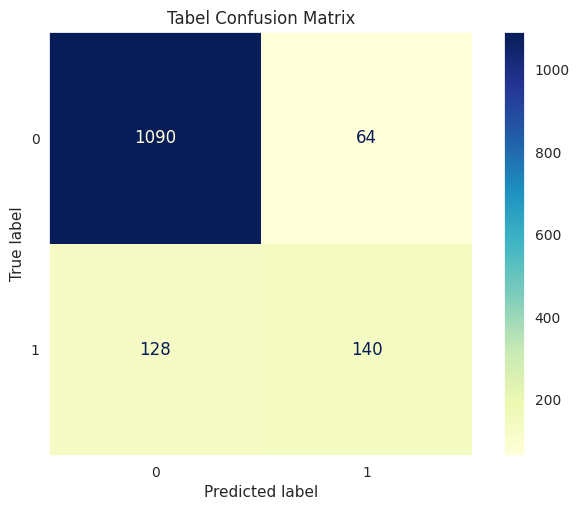

In [101]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='YlGnBu')
plt.title('Tabel Confusion Matrix')
plt.show()

In [102]:
# Classification report model
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      1154
         1.0       0.69      0.52      0.59       268

    accuracy                           0.86      1422
   macro avg       0.79      0.73      0.76      1422
weighted avg       0.86      0.86      0.86      1422



In [103]:
# Precision Recall Curve
y_pred = xgb.predict_proba(X_test)[:,1]
prec, recall, _ = precision_recall_curve(y_test, y_pred, pos_label=xgb.classes_[1])
pr_display = PrecisionRecallDisplay(prec, recall)

In [104]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=xgb.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

ROC AUC Score is : 0.8772763134069687


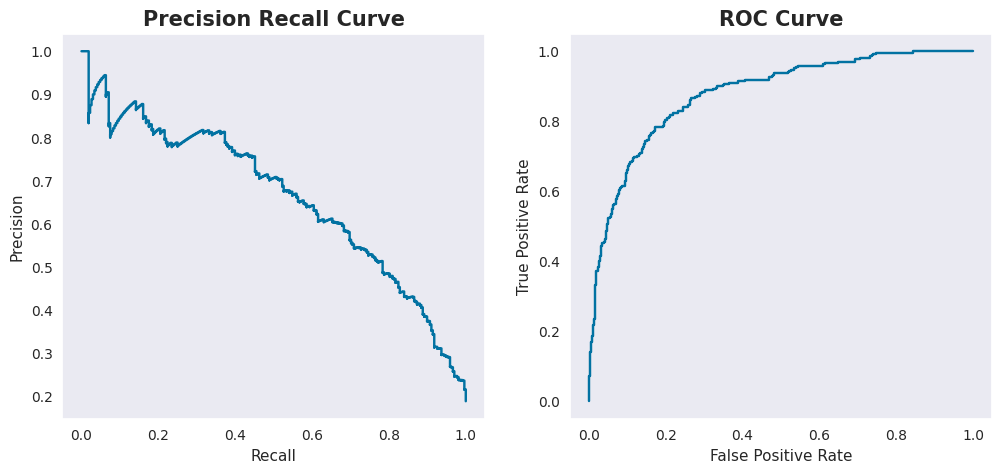

In [105]:
# roc auc score
auc_score = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score is : {auc_score}')

# Plotting Precision Recall and ROC Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

pr_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
ax1.set_title('Precision Recall Curve', fontsize=15, fontweight='bold')
ax2.set_title('ROC Curve', fontsize=15, fontweight='bold')
plt.show()

## Feature Importance

In [106]:
feature_importance = pd.DataFrame({
    'Features':X.columns,
    'Importance':xgb.feature_importances_}).sort_values('Importance', ascending=False)

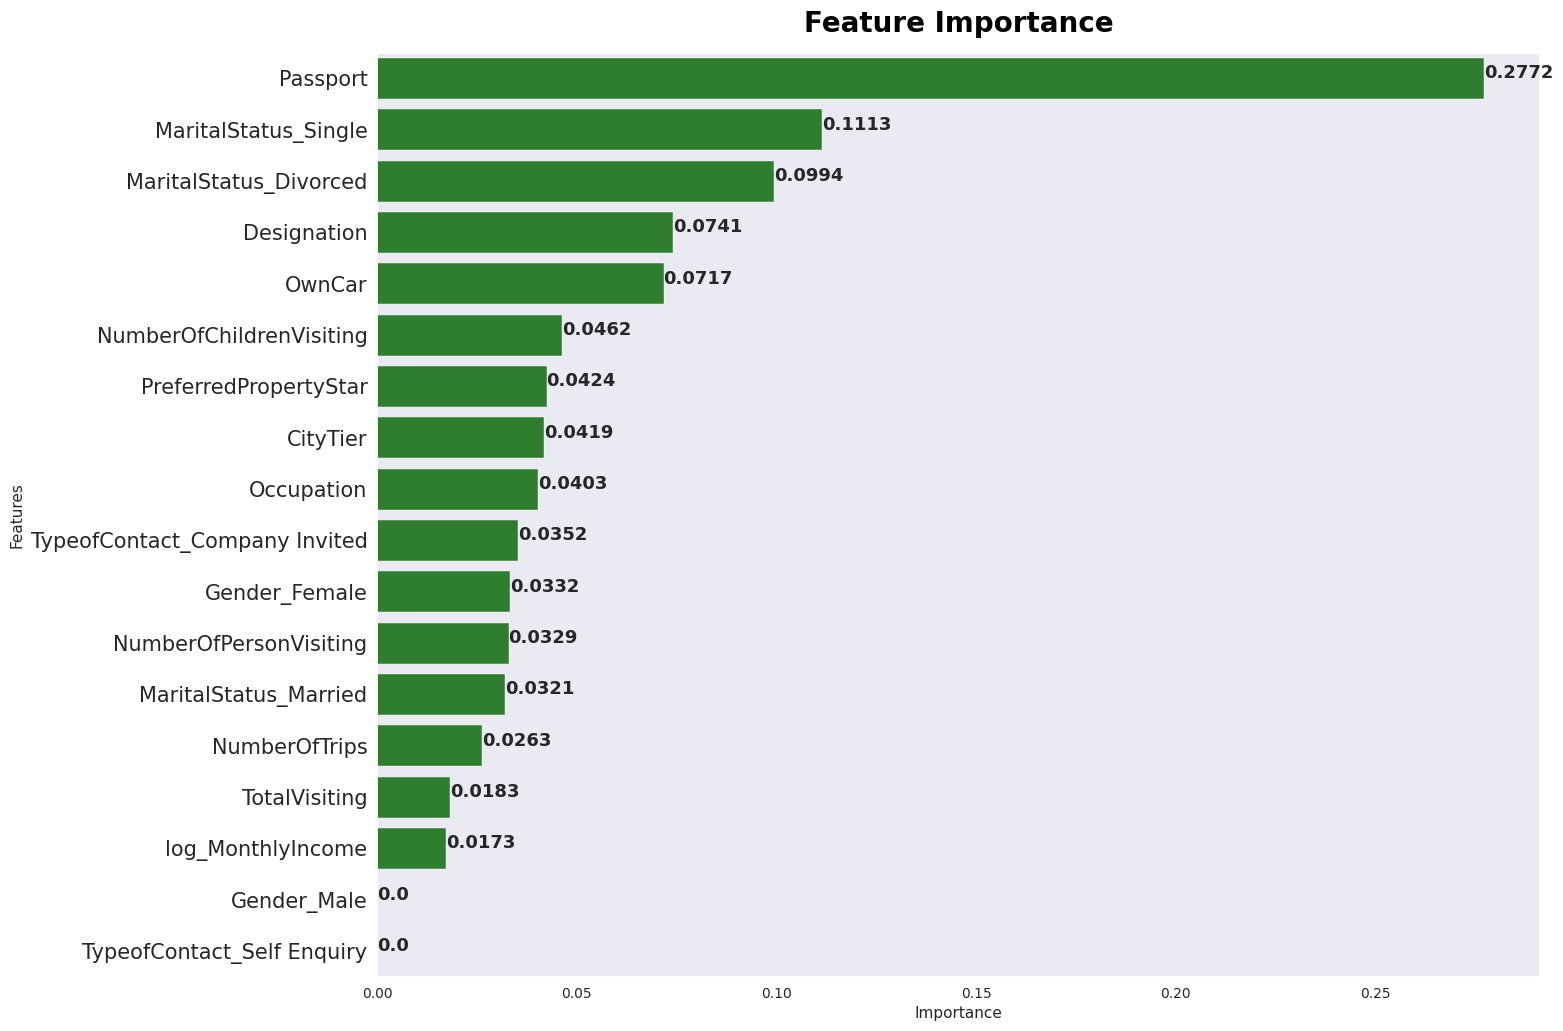

In [107]:
plt.figure(figsize=(15, 12))
sns.barplot(data=feature_importance, x='Importance', y='Features', color='forestgreen')

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],i, round(x[i], 4), fontsize=13, fontweight='bold')

x = list(feature_importance['Importance'])
y = list(feature_importance['Features'])

plt.title('Feature Importance', fontsize=20, color='black', pad=15, fontweight='bold')
plt.yticks(fontsize=15)
addlabels(x, y)
plt.show()

Beberapa Feature Importance hasil dari modelling XGBoost diantaranya adalah **Passport, MaritalStatus_Single, OwnCar, MaritalStatus_Divorce, Designation, NumberOfChildrenVisiting, Occupation, CityTier, PreferredPropertyStar, MaritalStatus_Married, TypeOfContact_Company Invited, Gender_Female, NumberOfTrips, NumberOfPersonVisiting, TotalVisiting dan log_MonthlyIncome**

In [108]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.4 MB/s eta 0:00:00


In [109]:
from xgboost import XGBClassifier
dt = XGBClassifier()
dt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


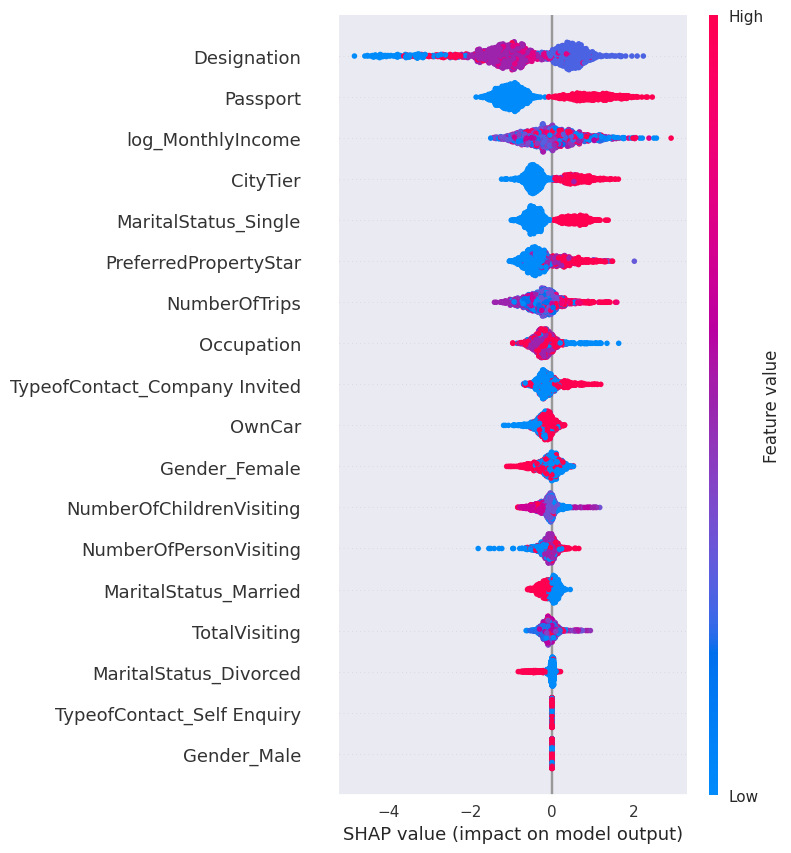

In [110]:
import shap
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test) # Summary shap value terhadap label positive

Dari observasi SHAP diatas dapat kita ambil kesimpulan bahwa pelanggan yang memiliki pasport, tinggal di citytier 3 dan belum menikah atau berstatus single berkorelasi positif terhadap ProdTaken(Target) yang mana jika difollow-up lebih lanjut kemungkinan besar akan membeli produk.

In [111]:
y_pred_final = pd.DataFrame({'ProdTaken':y_test, 'ProdTaken_Prob':y_pred})

,ProdTaken,ProdTaken_Prob
0,0.0,0.016119
1,0.0,0.071916
2,0.0,0.279692
3,0.0,0.069787
4,0.0,0.123934
